# **Data Drifters Project - 2 -Futurense Bootcamp**

## **1.Loading the Data**
This Python code imports the pandas library and reads a CSV file named ***'Loan 2.csv'*** into a DataFrame called df. The ***read_csv*** function loads the file's data, enabling structured data manipulation and analysis using pandas' powerful tools for handling tabular data.

In [24]:
import pandas as pd
# Load the CSV file
file_path = 'Loan 2.csv'
df = pd.read_csv(file_path)

## **2.Identifying and Fixing Null Values**

### **2.1.Checking for Null Values in all the Columns**
The code computes and displays the number of missing values in each column of a DataFrame. It uses ***df.isnull().sum()*** to count nulls and sorts the counts in descending order with ***sort_values(ascending=False)***

In [25]:
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Customer ID                       0
No. of Defaults                   0
Name                              0
Expense Type 1                    0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 2                    0
dtype: int64


### **2.2.Checking Unique Values in all Columns**
This code specifies a column ('Profession') in a DataFrame df and finds all unique values within that column using the ***unique()*** method. It then prints these unique values.

In [26]:
# Specify the column name for which you want to find unique values
column_name = 'Profession'  # Replace 'your_column_name' with the actual column name

# Display unique values in the specified column
unique_values = df[column_name].unique()
print(unique_values)


['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


### **2.3.Fixing all the Null Values in the columns**
This code defines an employment mapping and applies it to a DataFrame to fill in missing ***"Type of Employment"*** values based on the ***"Profession"*** column. It also fills missing values in various other columns with appropriate statistics (median, mean, or specified values), counts the filled entries, and saves the updated DataFrame to a CSV file.


In [27]:
# Define the mapping based on the Profession
employment_mapping = {
    'maternity leave': 'unspecified',
    'buiesnessman': 'self employed',
    'student': 'not working',
    'unemployed': 'not working',
    'commerical associate': 'self employed',
    'state servant': 'government job',
    'pensioner': 'retired',
    'working': 'unspecified'
}

# Function to apply the mapping and capitalize the first letter of each word
def map_employment_and_title_case(row):
    if pd.isnull(row['Type of Employment']):
        profession = row['Profession']
        if isinstance(profession, str):
            mapped_value = employment_mapping.get(profession.lower(), 'Unspecified')
            if isinstance(mapped_value, str):
                return mapped_value.title()
        return 'Unspecified'
    return row['Type of Employment']

# Count modifications for Type of Employment
type_of_employment_null_count = df['Type of Employment'].isnull().sum()
df['Type of Employment'] = df.apply(map_employment_and_title_case, axis=1)
type_of_employment_filled_count = df['Type of Employment'].isnull().sum() - type_of_employment_null_count

# Fill null values for other columns and count modifications
property_age_null_count = df['Property Age'].isnull().sum()
df['Property Age'].fillna(df['Property Age'].median(), inplace=True)
property_age_filled_count = property_age_null_count - df['Property Age'].isnull().sum()

income_null_count = df['Income (USD)'].isnull().sum()
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
income_filled_count = income_null_count - df['Income (USD)'].isnull().sum()

dependents_null_count = df['Dependents'].isnull().sum()
df['Dependents'].fillna(0, inplace=True)
dependents_filled_count = dependents_null_count - df['Dependents'].isnull().sum()

credit_score_null_count = df['Credit Score'].isnull().sum()
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)
credit_score_filled_count = credit_score_null_count - df['Credit Score'].isnull().sum()

income_stability_null_count = df['Income Stability'].isnull().sum()
df['Income Stability'].fillna('Unclear', inplace=True)
income_stability_filled_count = income_stability_null_count - df['Income Stability'].isnull().sum()

active_credit_card_null_count = df['Has Active Credit Card'].isnull().sum()
df['Has Active Credit Card'].fillna('Not Known', inplace=True)
active_credit_card_filled_count = active_credit_card_null_count - df['Has Active Credit Card'].isnull().sum()

property_location_null_count = df['Property Location'].isnull().sum()
df['Property Location'].fillna('Not Specified', inplace=True)
property_location_filled_count = property_location_null_count - df['Property Location'].isnull().sum()

loan_sanction_amount_null_count = df['Loan Sanction Amount (USD)'].isnull().sum()
df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].mean(), inplace=True)
loan_sanction_amount_filled_count = loan_sanction_amount_null_count - df['Loan Sanction Amount (USD)'].isnull().sum()

current_loan_expenses_null_count = df['Current Loan Expenses (USD)'].isnull().sum()
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean(), inplace=True)
current_loan_expenses_filled_count = current_loan_expenses_null_count - df['Current Loan Expenses (USD)'].isnull().sum()

gender_null_count = df['Gender'].isnull().sum()
df['Gender'].fillna('Not Specified', inplace=True)
gender_filled_count = gender_null_count - df['Gender'].isnull().sum()

# Print the counts of filled null values
print(f"Type of Employment: {type_of_employment_filled_count} entries filled")
print(f"Property Age: {property_age_filled_count} entries filled")
print(f"Income (USD): {income_filled_count} entries filled")
print(f"Dependents: {dependents_filled_count} entries filled")
print(f"Credit Score: {credit_score_filled_count} entries filled")
print(f"Income Stability: {income_stability_filled_count} entries filled")
print(f"Has Active Credit Card: {active_credit_card_filled_count} entries filled")
print(f"Property Location: {property_location_filled_count} entries filled")
print(f"Loan Sanction Amount (USD): {loan_sanction_amount_filled_count} entries filled")
print(f"Current Loan Expenses (USD): {current_loan_expenses_filled_count} entries filled")
print(f"Gender: {gender_filled_count} entries filled")

# Save the updated DataFrame to a new CSV file
df.to_csv('Loan DataSet NullRemoved.csv', index=False)


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1491966404.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Age'].fillna(df['Property Age'].median(), inplace=True)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1491966404.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Type of Employment: -7270 entries filled
Property Age: 4850 entries filled
Income (USD): 4576 entries filled
Dependents: 2493 entries filled
Credit Score: 1703 entries filled
Income Stability: 1683 entries filled
Has Active Credit Card: 1566 entries filled
Property Location: 356 entries filled
Loan Sanction Amount (USD): 340 entries filled
Current Loan Expenses (USD): 172 entries filled
Gender: 53 entries filled


### **2.4.Checking If Null Values still exist**

This code imports the ***pandas*** library, loads a CSV file named ***'Loan DataSet NullRemoved.csv'*** into a DataFrame ***dfn***, and calculates the number of missing values in each column. The result, ***null_counts1***, is a sorted series (in descending order) of the null counts, which is then printed.

In [28]:
import pandas as pd
# Load the CSV file
file_path = 'Loan DataSet NullRemoved.csv'
dfn = pd.read_csv(file_path)
null_counts1 = dfn.isnull().sum().sort_values(ascending=False)
print(null_counts1)

Customer ID                    0
Name                           0
Property Price                 0
Co-Applicant                   0
Property Location              0
Property Type                  0
Property Age                   0
Property ID                    0
Has Active Credit Card         0
No. of Defaults                0
Credit Score                   0
Dependents                     0
Expense Type 2                 0
Expense Type 1                 0
Current Loan Expenses (USD)    0
Loan Amount Request (USD)      0
Location                       0
Type of Employment             0
Profession                     0
Income Stability               0
Income (USD)                   0
Age                            0
Gender                         0
Loan Sanction Amount (USD)     0
dtype: int64


## **3.Identifying Outliers and Fixing Them**

### **3.1.Loading the Dataset which is removed of Null Values**
The code loads a CSV file named ***"Loan DataSet NullRemoved.csv"*** into a Pandas DataFrame. It first specifies the file path as ***file_path_nullrem*** and then uses the ***pd.read_csv()*** function to read the CSV file located at that path, storing the data in the variable ***dfn***.

In [29]:
# Load the dataset
file_path_nullrem    = 'Loan DataSet NullRemoved.csv'
dfn = pd.read_csv(file_path_nullrem)

### **3.2.Checking Outliers in Gender Column**

The code defines valid values for the ***Gender*** column as ***['F', 'M', 'Not Specified']***. It identifies outliers in a DataFrame ***('dfn')*** where ***'Gender'*** values are not in the valid list. Outliers are removed from ***'dfn'***, and the cleaned dataset is saved to ***'file_path_nullrem'***. Results include the number of outliers found and the file path where the cleaned dataset is saved.

In [30]:
# Define the valid values for the Gender column
valid_genders = ['F', 'M', 'Not Specified']

# Identify outliers in the Gender column
outliers = dfn[~dfn['Gender'].isin(valid_genders)]

# Remove outliers
df_cleaned = dfn[dfn['Gender'].isin(valid_genders)]

# Save the cleaned dataset back to the same file
df_cleaned.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of outliers found in Gender column: {len(outliers)}")
print(f"Dataset cleaned and saved to: {file_path_nullrem}")

Number of outliers found in Gender column: 0
Dataset cleaned and saved to: Loan DataSet NullRemoved.csv


### **3.3.Checking Outliers in Age Column using IQR**
This code calculates the ***Interquartile Range (IQR)*** for the ***'Age'*** column in a DataFrame (dfn). It identifies outliers based on the ***IQR method***, removes them from dfn, saves the cleaned dataset to a specified file path ***(file_path_nullrem)***, and prints the number of outliers removed and the file path where the cleaned dataset is saved.

In [31]:
# Calculate IQR for the Income (USD) column
Q1 = dfn['Income (USD)'].quantile(0.25)
Q3 = dfn['Income (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the Income (USD) column
income_outliers = dfn[(dfn['Income (USD)'] < lower_bound) | (dfn['Income (USD)'] > upper_bound)]

# Handle null values in the Income (USD) column
# For this example, we'll fill null values with the median income
median_income = dfn['Income (USD)'].median()
dfn['Income (USD)'].fillna(median_income, inplace=True)

# Cap outliers
dfn['Income (USD)'] = dfn['Income (USD)'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Save the cleaned dataset back to the same file
file_path_cleaned = file_path_nullrem  # Replace with your desired file path
dfn.to_csv(file_path_cleaned, index=False)

# Output results
print(f"Number of outliers found in Income (USD) column: {len(income_outliers)}")
print(f"Dataset cleaned and saved to: {file_path_cleaned}")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3825343251.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Income (USD)'].fillna(median_income, inplace=True)


Number of outliers found in Income (USD) column: 1874
Dataset cleaned and saved to: Loan DataSet NullRemoved.csv


### **3.4.Checking Outliers in Income Stability Column**
This code snippet ensures the ***Income Stability*** column in a DataFrame ***('dfn')*** contains only valid values ***('Low', 'High', 'Unclear')***. It identifies and handles invalid and null entries, replacing them with ***'Unclear'***. The cleaned DataFrame is then saved back to the original file, with a summary of invalid entries printed.

In [32]:
# Define valid values for Income Stability
valid_income_stability = ['Low', 'High', 'Unclear']

# Identify invalid and null values in the Income Stability column
income_stability_invalid = dfn[~dfn['Income Stability'].isin(valid_income_stability) | dfn['Income Stability'].isnull()]

# Handle invalid and null values in Income Stability column
dfn['Income Stability'] = dfn['Income Stability'].apply(lambda x: 'Unclear' if x not in valid_income_stability else x).fillna('Unclear')

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Income Stability column: {len(income_stability_invalid)}")
print("Income Stability column has been cleaned and saved to the dataset.")


Number of invalid entries found in Income Stability column: 0
Income Stability column has been cleaned and saved to the dataset.


### **3.5.Checking Outliers in Profession Column**
This code snippet ensures the validity and cleanliness of the ***'Profession'*** column in a DataFrame ***('dfn')***. It defines valid professions, identifies and handles invalid or null entries by replacing them with ***'Unemployed'***, and saves the cleaned dataset back to a file. Results are printed showing the number of invalid entries corrected.


In [33]:
# Define valid values for Profession
valid_profession = ['Working', 'Pensioner', 'State servant', 'Commercial associate', 'Unemployed', 
                    'Student', 'Businessman', 'Maternity leave']

# Identify invalid and null values in the Profession column
profession_invalid = dfn[~dfn['Profession'].isin(valid_profession) | dfn['Profession'].isnull()]

# Handle invalid and null values in Profession column
dfn['Profession'] = dfn['Profession'].apply(lambda x: 'Unemployed' if x not in valid_profession else x).fillna('Unemployed')

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Profession column: {len(profession_invalid)}")
print("Profession column has been cleaned and saved to the dataset.")


Number of invalid entries found in Profession column: 0
Profession column has been cleaned and saved to the dataset.


### **3.6.Checking Outliers in Type of Employment Column**
This code validates, cleans, and saves a dataset's ***"Type of Employment"*** column. It defines valid employment types, identifies and handles invalid or null entries by setting them to ***'Unspecified'***, and saves the cleaned dataset back to the original file path. It outputs the number of invalid entries found.

In [34]:
# Define valid values for Type of Employment
valid_employment_types = [
    'Sales staff', 'Unspecified', 'Retired', 'High skill tech staff',
    'Secretaries', 'Laborers', 'Managers', 'Cooking staff', 'Core staff',
    'Drivers', 'Realty agents', 'Security staff', 'Accountants',
    'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
    'Cleaning staff', 'Low-skill Laborers', 'Government Job', 'HR staff',
    'IT staff', 'Not Working'
]

# Identify invalid and null values in the Type of Employment column
employment_invalid = dfn[~dfn['Type of Employment'].isin(valid_employment_types) | dfn['Type of Employment'].isnull()]

# Handle invalid and null values in Type of Employment column
dfn['Type of Employment'] = dfn['Type of Employment'].apply(lambda x: 'Unspecified' if x not in valid_employment_types else x).fillna('Unspecified')

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Type of Employment column: {len(employment_invalid)}")
print("Type of Employment column has been cleaned and saved to the dataset.")


Number of invalid entries found in Type of Employment column: 0
Type of Employment column has been cleaned and saved to the dataset.


### **3.7.Checking Outliers in Location Column**
The code snippet performs data validation and cleaning on a DataFrame column named ***'Location'***. It defines valid location values, identifies and handles entries not in the valid list or null, sets them to ***'Urban'***, fills missing values with ***'Urban'***, and saves the cleaned dataset back to the original file.

In [35]:
# Define valid values for Location
valid_locations = ['Semi-Urban', 'Rural', 'Urban']

# Identify invalid and null values in the Location column
location_invalid = dfn[~dfn['Location'].isin(valid_locations) | dfn['Location'].isnull()]

# Handle invalid and null values in Location column
dfn['Location'] = dfn['Location'].apply(lambda x: 'Urban' if x not in valid_locations else x).fillna('Urban')

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Location column: {len(location_invalid)}")
print("Location column has been cleaned and saved to the dataset.")


Number of invalid entries found in Location column: 0
Location column has been cleaned and saved to the dataset.


### **3.8.Checking Outliers in Loan Amount Request (USD) Column**
The code first handles null values in the ***'Loan Amount Request (USD)'*** column by filling them with the median. It then calculates the ***Interquartile Range (IQR)*** to define outliers' bounds. Outliers are identified, capped within the bounds, and the cleaned dataset is saved back to the original file.

In [36]:
# Handle null values in the Loan Amount Request (USD) column
# For this example, we'll fill null values with the median loan amount request
median_loan_amount = dfn['Loan Amount Request (USD)'].median()
dfn['Loan Amount Request (USD)'].fillna(median_loan_amount, inplace=True)

# Calculate IQR for the Loan Amount Request (USD) column
Q1 = dfn['Loan Amount Request (USD)'].quantile(0.25)
Q3 = dfn['Loan Amount Request (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the Loan Amount Request (USD) column
loan_amount_outliers = dfn[(dfn['Loan Amount Request (USD)'] < lower_bound) | (dfn['Loan Amount Request (USD)'] > upper_bound)]

# Cap outliers
dfn['Loan Amount Request (USD)'] = dfn['Loan Amount Request (USD)'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of outliers found in Loan Amount Request (USD) column: {len(loan_amount_outliers)}")
print(f"Dataset cleaned and saved to: {file_path_nullrem}")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1545022674.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Loan Amount Request (USD)'].fillna(median_loan_amount, inplace=True)


Number of outliers found in Loan Amount Request (USD) column: 752
Dataset cleaned and saved to: Loan DataSet NullRemoved.csv


### **3.9.Checking Outliers in Current Loan Expenses (USD) Column**
The code handles null values in the ***'Current Loan Expenses (USD)'*** column by filling them with the median. It then identifies outliers using the ***Interquartile Range (IQR) method***, caps outliers, and saves the cleaned dataset to a new file. Information about outliers and file location is printed for verification.


In [37]:
# Handle null values in the Current Loan Expenses (USD) column
# For this example, we'll fill null values with the median loan expenses
median_loan_expenses = dfn['Current Loan Expenses (USD)'].median()
dfn['Current Loan Expenses (USD)'].fillna(median_loan_expenses, inplace=True)

# Calculate IQR for the Current Loan Expenses (USD) column
Q1 = dfn['Current Loan Expenses (USD)'].quantile(0.25)
Q3 = dfn['Current Loan Expenses (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the Current Loan Expenses (USD) column
loan_expense_outliers = dfn[(dfn['Current Loan Expenses (USD)'] < lower_bound) | (dfn['Current Loan Expenses (USD)'] > upper_bound)]

# Cap outliers
dfn['Current Loan Expenses (USD)'] = dfn['Current Loan Expenses (USD)'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of outliers found in Current Loan Expenses (USD) column: {len(loan_expense_outliers)}")
print(f"Dataset cleaned and saved to: {file_path_nullrem}")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1556235424.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Current Loan Expenses (USD)'].fillna(median_loan_expenses, inplace=True)


Number of outliers found in Current Loan Expenses (USD) column: 874
Dataset cleaned and saved to: Loan DataSet NullRemoved.csv


### **3.10.Checking Outliers in Expense Type 1 and Expense Type 2 Column**
The code defines valid values ***('Y' and 'N')*** for ***Expense Type 1*** and ***Expense Type 2***. It identifies and handles invalid or null values in these columns in a DataFrame ***(dfn)***. Invalid entries are replaced with ***'N'*** and null values are filled with ***'N'***. After cleaning, the DataFrame is saved back to the original file

In [38]:
# Define valid values for Expense Type 1 and Expense Type 2
valid_values = ['Y', 'N']

# Handle invalid and null values in Expense Type 1
expense_type_1_invalid = dfn[~dfn['Expense Type 1'].isin(valid_values) | dfn['Expense Type 1'].isnull()]
dfn['Expense Type 1'] = dfn['Expense Type 1'].apply(lambda x: 'N' if x not in valid_values else x).fillna('N')

# Handle invalid and null values in Expense Type 2
expense_type_2_invalid = dfn[~dfn['Expense Type 2'].isin(valid_values) | dfn['Expense Type 2'].isnull()]
dfn['Expense Type 2'] = dfn['Expense Type 2'].apply(lambda x: 'N' if x not in valid_values else x).fillna('N')

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Expense Type 1 column: {len(expense_type_1_invalid)}")
print(f"Number of invalid entries found in Expense Type 2 column: {len(expense_type_2_invalid)}")
print("Expense Type 1 and Expense Type 2 columns have been cleaned and saved to the dataset.")


Number of invalid entries found in Expense Type 1 column: 0
Number of invalid entries found in Expense Type 2 column: 0
Expense Type 1 and Expense Type 2 columns have been cleaned and saved to the dataset.


### **3.11.Checking Outliers in Dependents Column**
The code handles null values in the ***'Dependents'*** column by filling them with the median. It identifies outliers using the ***IQR method***, optionally removes them, and saves the cleaned dataset to a new file. Finally, it prints the number of outliers detected and confirms the cleaning process.


In [39]:
# Handle null values in the Dependents column
# For this example, we'll fill null values with the median number of dependents
median_dependents = dfn['Dependents'].median()
dfn['Dependents'].fillna(median_dependents, inplace=True)

# Convert Dependents column to integer type
dfn['Dependents'] = dfn['Dependents'].astype(int)

# Identify outliers in the Dependents column
Q1 = dfn['Dependents'].quantile(0.25)
Q3 = dfn['Dependents'].quantile(0.75)
IQR = Q3 - Q1

dependents_outliers = dfn[(dfn['Dependents'] < (Q1 - 1.5 * IQR)) | (dfn['Dependents'] > (Q3 + 1.5 * IQR))]

# Print number of outliers found
print(f"Number of outliers found in Dependents column: {len(dependents_outliers)}")

# Remove outliers (optional step, adjust as needed)
dfn_cleaned = dfn[~((dfn['Dependents'] < (Q1 - 1.5 * IQR)) | (dfn['Dependents'] > (Q3 + 1.5 * IQR)))]

# Save the cleaned dataset back to the same file
dfn_cleaned.to_csv(file_path_nullrem, index=False)

# Output results
print("Dependents column has been cleaned (with outliers handled) and saved to the dataset.")


Number of outliers found in Dependents column: 10


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3284082582.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Dependents'].fillna(median_dependents, inplace=True)


Dependents column has been cleaned (with outliers handled) and saved to the dataset.


### **3.12.Checking Outliers in Credit Score Column**
This Python script handles null values in the ***'Credit Score'*** column by filling them with the ***median***, calculates the ***IQR*** to identify outliers, caps outliers using the ***IQR bounds***, saves the cleaned dataset to a specified file path, and prints the number of outliers detected along with the file location.

In [40]:
# Handle null values in the Credit Score column
# For this example, we'll fill null values with the median credit score
median_credit_score = dfn['Credit Score'].median()
dfn['Credit Score'].fillna(median_credit_score, inplace=True)

# Calculate IQR for the Credit Score column
Q1 = dfn['Credit Score'].quantile(0.25)
Q3 = dfn['Credit Score'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the Credit Score column
credit_score_outliers = dfn[(dfn['Credit Score'] < lower_bound) | (dfn['Credit Score'] > upper_bound)]

# Cap outliers
dfn['Credit Score'] = dfn['Credit Score'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of outliers found in Credit Score column: {len(credit_score_outliers)}")
print(f"Dataset cleaned and saved to: {file_path_nullrem}")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3548084432.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Credit Score'].fillna(median_credit_score, inplace=True)


Number of outliers found in Credit Score column: 0
Dataset cleaned and saved to: Loan DataSet NullRemoved.csv


### **3.13.Checking Outliers in No.of Defaults Column**
The code handles null values in the ***'No. of Defaults'*** column of a DataFrame. It fills null values with ***0***, ensures all values are either ***0*** or ***1***, saves the cleaned data back to the original file, and confirms no outliers were found in a binary column, providing a cleanup summary.


In [41]:
# Handle null values in the No. of Defaults column
# For this example, we'll fill null values with 0
dfn['No. of Defaults'].fillna(0, inplace=True)

# Ensure values are within expected bounds (0 or 1)
dfn['No. of Defaults'] = dfn['No. of Defaults'].apply(lambda x: 1 if x > 0 else 0)

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of outliers found in No. of Defaults column: 0")  # No outliers expected for a binary column
print("No. of Defaults column has been cleaned and saved to the dataset.")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1742149382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['No. of Defaults'].fillna(0, inplace=True)


Number of outliers found in No. of Defaults column: 0
No. of Defaults column has been cleaned and saved to the dataset.


### **3.14.Checking Outliers in Has Active Credit Card Column**
The code fills missing values in the ***'Has Active Credit Card'*** column of a DataFrame with ***'Not Known'***. It thus ensures all values are among ***['Not Known', 'Unpossessed', 'Active', 'Inactive']*** then, updates the original file, and checks for outliers the column, providing a summary of the cleanup process without outliers.




In [42]:
# Define valid values for Has Active Credit Card
valid_values = ['Not Known', 'Unpossessed', 'Active', 'Inactive']

# Identify invalid and null values in the Has Active Credit Card column
invalid_values = dfn[~dfn['Has Active Credit Card'].isin(valid_values) | dfn['Has Active Credit Card'].isnull()]

# Handle null and invalid values in Has Active Credit Card column
dfn['Has Active Credit Card'] = dfn['Has Active Credit Card'].apply(lambda x: 'Not Known' if pd.isnull(x) else x)
dfn.loc[~dfn['Has Active Credit Card'].isin(valid_values), 'Has Active Credit Card'] = 'Not Known'

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
print(f"Number of invalid entries found in Has Active Credit Card column: {len(invalid_values)}")
print("Has Active Credit Card column has been cleaned and saved to the dataset.")


Number of invalid entries found in Has Active Credit Card column: 0
Has Active Credit Card column has been cleaned and saved to the dataset.


### **3.15.Checking Outliers in Property Age Column**
The code snippet handles data preprocessing for the ***'Property Age'*** column in a DataFrame ***(dfn)***. It first fills missing values with the median property age. Then, it identifies outliers using quartiles and the ***Interquartile Range (IQR)***, caps outliers within a defined range, and finally saves the cleaned data back to the original file. This ensures the data is prepared for further analysis or modeling by addressing missing values and mitigating the impact of outliers.

In [43]:
# Handle null values in the Property Age column
# For this example, we'll fill null values with the median property age
median_property_age = dfn['Property Age'].median()
dfn['Property Age'].fillna(median_property_age, inplace=True)

# Identify outliers in the Property Age column
Q1 = dfn['Property Age'].quantile(0.25)
Q3 = dfn['Property Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate number of outliers
property_age_outliers = dfn[(dfn['Property Age'] < lower_bound) | (dfn['Property Age'] > upper_bound)]
num_outliers = len(property_age_outliers)

# Fix outliers by capping them within the lower and upper bounds
dfn['Property Age'] = dfn['Property Age'].clip(lower=lower_bound, upper=upper_bound)

# Output results
print(f"Number of outliers found in Property Age column: {num_outliers}")
print("Outliers in Property Age column have been fixed and saved to the dataset.")

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)


Number of outliers found in Property Age column: 1930
Outliers in Property Age column have been fixed and saved to the dataset.


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\2627632245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Property Age'].fillna(median_property_age, inplace=True)


### **3.16.Checking Outliers in Property Location Column**

The code snippet addresses data cleaning for the ***'Property Location'*** column in the DataFrame ***(dfn)***. It fills missing values with ***'Not Specified'*** to ensure completeness. It identifies and corrects invalid or unexpected values by setting them to 'Not Specified'. After cleaning, the DataFrame is saved back to the original file ***(file_path_nullrem)***, preserving the data integrity. The code concludes by outputting the number of invalid entries found and confirming the successful cleaning and saving of the ***'Property Location'*** column.

In [44]:
# Handle null values in the Property Location column
# For this example, we'll fill null values with 'Not Specified'
dfn['Property Location'].fillna('Not Specified', inplace=True)

# Identify invalid or unexpected values in the Property Location column
valid_values = ['Rural', 'Urban', 'Semi-Urban', 'Not Specified']
invalid_locations = dfn[~dfn['Property Location'].isin(valid_values)]

# Handle invalid values by setting them to 'Not Specified'
dfn.loc[~dfn['Property Location'].isin(valid_values), 'Property Location'] = 'Not Specified'

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)

# Output results
num_invalid = len(invalid_locations)
print(f"Number of invalid entries found in Property Location column: {num_invalid}")
print("Property Location column has been cleaned and saved to the dataset.")


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\1945302558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Property Location'].fillna('Not Specified', inplace=True)


Number of invalid entries found in Property Location column: 0
Property Location column has been cleaned and saved to the dataset.


### **3.17.Checking Outliers in Co-Applicant Column**
The code snippet addresses data preprocessing for the ***'Co-Applicant'*** column in the DataFrame ***(dfn)***. It fills missing values with ***0***, assumes no co-applicant in those cases. The column is converted to integer type for consistency and numerical operations. Outliers, identified as negative values, are corrected by setting them to ***0***. After cleaning, the DataFrame is saved back to the original file ***(file_path_nullrem)***. The code prints the number of outliers found and confirms the successful cleaning and saving of the ***'Co-Applicant'*** column.

In [45]:
# Handle null values in the Co-Applicant column
# For this example, we'll fill null values with 0
dfn['Co-Applicant'].fillna(0, inplace=True)

# Convert Co-Applicant column to integer type
dfn['Co-Applicant'] = dfn['Co-Applicant'].astype(int)

# Identify outliers (if any)
coapplicant_outliers = dfn[dfn['Co-Applicant'] < 0]

# Fix outliers by setting negative values to 0
dfn.loc[dfn['Co-Applicant'] < 0, 'Co-Applicant'] = 0

# Output results
num_outliers = len(coapplicant_outliers)
print(f"Number of outliers found in Co-Applicant column: {num_outliers}")
print("Co-Applicant column has been cleaned and saved to the dataset.")

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)


Number of outliers found in Co-Applicant column: 168
Co-Applicant column has been cleaned and saved to the dataset.


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\2926049048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Co-Applicant'].fillna(0, inplace=True)


### **3.18.Checking Outliers in Property Price Column**
The code snippet addresses preprocessing for the ***'Property Price'*** column in the DataFrame ***(dfn)***. It fills missing values with the median property price to ensure completeness. The code identifies outliers using statistical quartiles and the ***Interquartile Range (IQR)***, and then adjusts outliers by capping them within defined upper and lower bounds. After cleaning, the DataFrame is saved back to the original file ***(file_path_nullrem)***, ensuring that all modifications are persisted. Finally, the code outputs the number of outliers found and confirms the successful cleaning and saving of the ***'Property Price'*** column.

In [46]:
# Handle null values in the Property Price column
# For this example, we'll fill null values with the median property price
median_property_price = dfn['Property Price'].median()
dfn['Property Price'].fillna(median_property_price, inplace=True)

# Identify outliers in the Property Price column
Q1 = dfn['Property Price'].quantile(0.25)
Q3 = dfn['Property Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

property_price_outliers = dfn[(dfn['Property Price'] < lower_bound) | (dfn['Property Price'] > upper_bound)]

# Fix outliers by capping them within the lower and upper bounds
dfn['Property Price'] = dfn['Property Price'].clip(lower=lower_bound, upper=upper_bound)

# Output results
num_outliers = len(property_price_outliers)
print(f"Number of outliers found in Property Price column: {num_outliers}")
print("Outliers in Property Price column have been fixed and saved to the dataset.")

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3898334097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Property Price'].fillna(median_property_price, inplace=True)


Number of outliers found in Property Price column: 863
Outliers in Property Price column have been fixed and saved to the dataset.


### **3.19.Checking Outliers in Loan Sanction Amount (USD) Column**
The code snippet addresses preprocessing for the ***'Loan Sanction Amount (USD)'*** column in the DataFrame ***(dfn)***. It fills missing values with the median loan sanction amount to ensure completeness. The code identifies outliers using statistical quartiles and the ***Interquartile Range (IQR)***, and then adjusts outliers by capping them within defined upper and lower bounds. After cleaning, the DataFrame is saved back to the original file ***(file_path_nullrem)***, ensuring that all modifications are persisted. Finally, the code outputs the number of outliers found and confirms the successful cleaning and saving of the ***'Loan Sanction Amount (USD)'*** column.


In [47]:
# Handle null values in the Loan Sanction Amount (USD) column
# For this example, we'll fill null values with the median loan sanction amount
median_loan_sanction_amount = dfn['Loan Sanction Amount (USD)'].median()
dfn['Loan Sanction Amount (USD)'].fillna(median_loan_sanction_amount, inplace=True)

# Identify outliers in the Loan Sanction Amount (USD) column
Q1 = dfn['Loan Sanction Amount (USD)'].quantile(0.25)
Q3 = dfn['Loan Sanction Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loan_sanction_amount_outliers = dfn[(dfn['Loan Sanction Amount (USD)'] < lower_bound) | (dfn['Loan Sanction Amount (USD)'] > upper_bound)]

# Fix outliers by capping them within the lower and upper bounds
dfn['Loan Sanction Amount (USD)'] = dfn['Loan Sanction Amount (USD)'].clip(lower=lower_bound, upper=upper_bound)

# Output results
num_outliers = len(loan_sanction_amount_outliers)
print(f"Number of outliers found in Loan Sanction Amount (USD) column: {num_outliers}")
print("Outliers in Loan Sanction Amount (USD) column have been fixed and saved to the dataset.")

# Save the cleaned dataset back to the same file
dfn.to_csv(file_path_nullrem, index=False)


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\547121621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Loan Sanction Amount (USD)'].fillna(median_loan_sanction_amount, inplace=True)


Number of outliers found in Loan Sanction Amount (USD) column: 453
Outliers in Loan Sanction Amount (USD) column have been fixed and saved to the dataset.


## **4.Data Analysis**


### **4.1.Univar Analysis**

#### **4.1.1.Categorical Analysis of Columns**

The code defines a list of categorical columns in a DataFrame ***(dfn)***. It then defines a function ***print_value_counts*** that takes a DataFrame and a list of columns as input, and prints the value counts for each specified column. Finally, the function is called to display the value counts for the categorical columns in the DataFrame.

In [48]:

# List of categorical columns
categorical_columns = [
    'Gender', 'Income Stability', 'Profession', 'Type of Employment', 
    'Location', 'Expense Type 1', 'Expense Type 2', 'Dependents', 
    'No. of Defaults', 'Has Active Credit Card', 'Property Type', 'Property Location'
]

# Function to print value counts for each categorical column
def print_value_counts(dfn, columns):
    for col in columns:
        print(f'Value counts for {col}:')
        print(dfn[col].value_counts())
        print('\n')

# Display value counts for each categorical column
print_value_counts(df, categorical_columns)


Value counts for Gender:
Gender
M                15053
F                14894
Not Specified       53
Name: count, dtype: int64


Value counts for Income Stability:
Income Stability
Low        25751
High        2566
Unclear     1683
Name: count, dtype: int64


Value counts for Profession:
Profession
Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: count, dtype: int64


Value counts for Type of Employment:
Type of Employment
Laborers                 5578
Unspecified              4100
Sales staff              3736
Core staff               3230
Retired                  2740
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Government Job  

#### **4.1.2.Merging Categories in Dependents Columns**

The code merges categories in the ***'Dependents'*** column of a DataFrame ***(dfn)***. It applies a ***lambda function*** to update the values in the column, replacing any value greater than or equal to 5 with ***'5 and more'***. After making the changes, it verifies the results by printing the value counts of the ***'Dependents'*** column.

In [49]:


# Merge categories in the 'Dependents' column
dfn['Dependents'] = dfn['Dependents'].apply(lambda x: '5 and more' if x >= 5 else x)

# Verify the changes
print(dfn['Dependents'].value_counts())


Dependents
2             13108
3              5719
1              5544
4              2704
0              2493
5 and more      432
Name: count, dtype: int64


#### **4.1.3.Merging Categories in Profession Columns**

The code merges specified categories in the ***'Profession'*** column of a DataFrame ***(dfn)***. It replaces the categories ***'Unemployed'***, ***'Businessman'***, ***'Student'***, and ***'Maternity leave'*** with ***'Other'***. After making the changes, it verifies the results by printing the value counts of the ***'Profession'*** column.

In [50]:


# Merge specified categories in the 'Profession' column
dfn['Profession'] = dfn['Profession'].replace({
    'Unemployed': 'Other',
    'Businessman': 'Other',
    'Student': 'Other',
    'Maternity leave': 'Other'
})

# Verify the changes
print(dfn['Profession'].value_counts())


Profession
Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Other                       6
Name: count, dtype: int64


#### **4.1.4.Analysing the Age Column**
The code calculates and prints various statistical measures for the ***'Age'*** column in a DataFrame ***(dfn)***, including ***mean***, ***median***, ***mode***, ***standard deviation***, ***minimum***, ***maximum***, and ***quantiles***. It then visualizes the distribution of ***'Age'*** using a histogram and a boxplot.

         Statistic      Value
0             Mean  40.092300
1           Median  40.000000
2             Mode  18.000000
3          Std Dev  16.045129
4              Min  18.000000
5              Max  65.000000
6  25th Percentile  25.000000
7  50th Percentile  40.000000
8  75th Percentile  55.000000


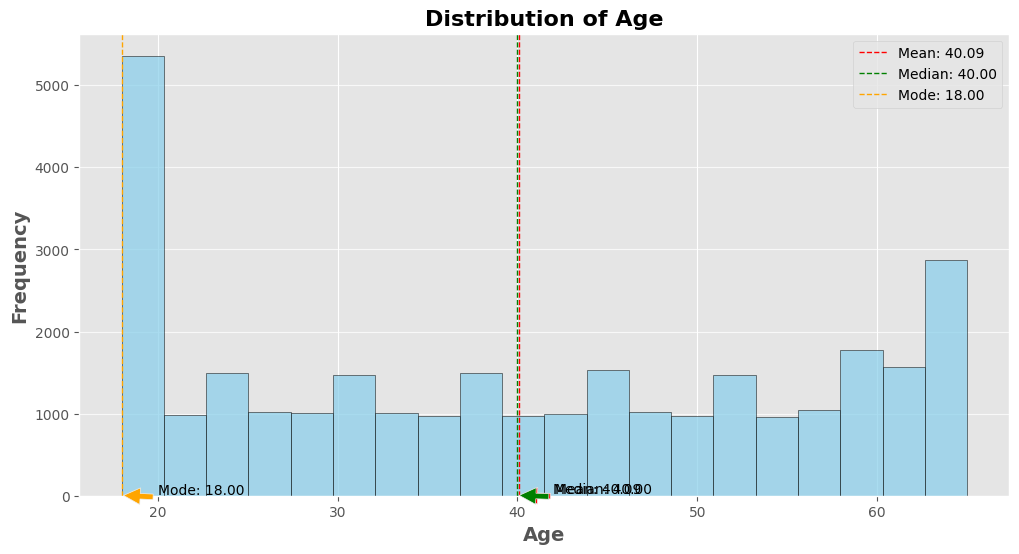

C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


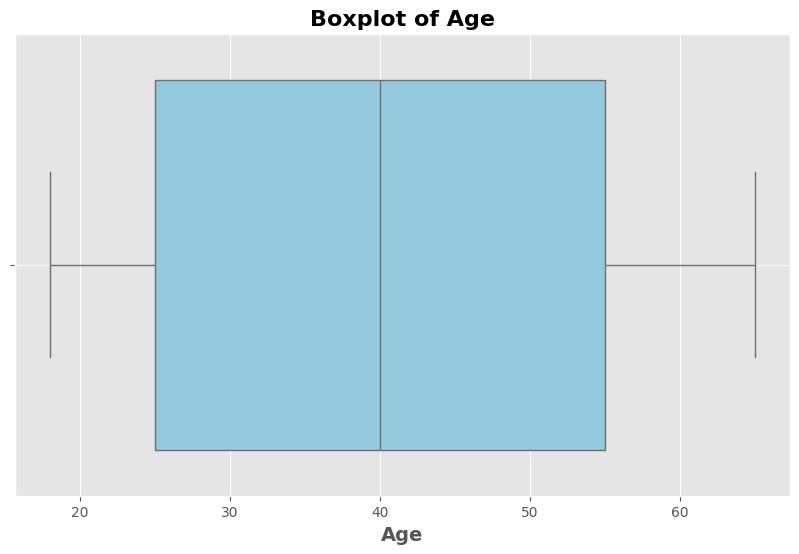

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dfn' is your DataFrame
ages = dfn['Age']

# Calculate statistics
mean_age = ages.mean()
median_age = ages.median()
mode_age = ages.mode()[0]
std_age = ages.std()
min_age = ages.min()
max_age = ages.max()
quantiles = ages.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_age, median_age, mode_age, std_age, min_age, max_age, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats)

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_age:.2f}')
plt.axvline(mode_age, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_age:.2f}')
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_age:.2f}', xy=(mean_age, 5), xytext=(mean_age + 2, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_age:.2f}', xy=(median_age, 5), xytext=(median_age + 2, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_age:.2f}', xy=(mode_age, 5), xytext=(mode_age + 2, 20), arrowprops=dict(facecolor='orange', shrink=0.05))

plt.show()

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ages, color='skyblue')
plt.title('Boxplot of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.75)
plt.show()



#### **4.1.5.Analysing the Loan Amount Request (USD) Column**
The code calculates and prints various statistical measures for the ***'Loan Amount Request (USD)'*** column in a DataFrame ***(dfn)***, including ***mean***, ***median***, ***mode***, ***standard deviation***, ***variance***, ***minimum***, ***maximum***, and ***quantiles***. It then visualizes the distribution of the ***'Loan Amount Request (USD)'*** using a histogram and a boxplot.

         Statistic         Value
0             Mean  8.781744e+04
1           Median  7.512807e+04
2             Mode  2.381449e+05
3          Std Dev  5.622258e+04
4         Variance  3.160979e+09
5              Min  6.048240e+03
6              Max  2.381449e+05
7  25th Percentile  4.117776e+04
8  50th Percentile  7.512807e+04
9  75th Percentile  1.199646e+05


C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


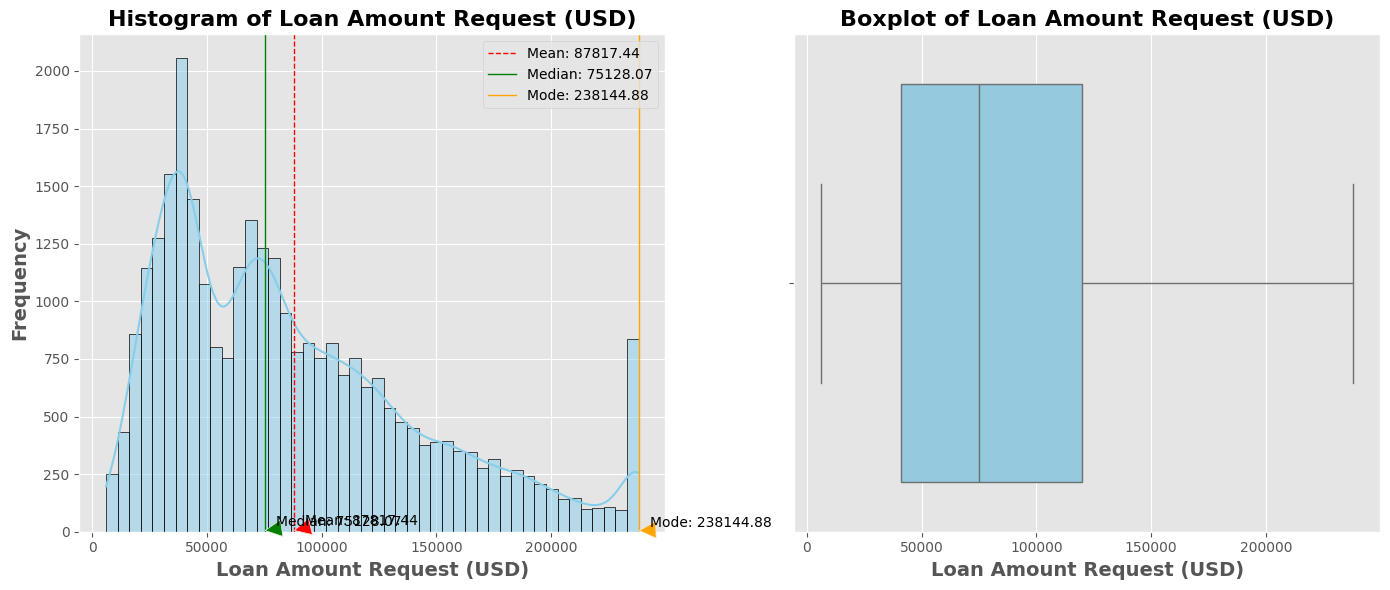

In [52]:


# Assuming 'dfn' is your DataFrame
loan_amount = dfn['Loan Amount Request (USD)']

# Calculate statistics
mean_loan_amount = loan_amount.mean()
median_loan_amount = loan_amount.median()
mode_loan_amount = loan_amount.mode()[0]
std_loan_amount = loan_amount.std()
var_loan_amount = loan_amount.var()
min_loan_amount = loan_amount.min()
max_loan_amount = loan_amount.max()
quantiles = loan_amount.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats_loan_amount = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_loan_amount, median_loan_amount, mode_loan_amount, std_loan_amount, var_loan_amount, min_loan_amount, max_loan_amount, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats_loan_amount)

# Visualization
plt.figure(figsize=(14, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(loan_amount, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_loan_amount, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_loan_amount:.2f}')
plt.axvline(median_loan_amount, color='green', linestyle='-', linewidth=1, label=f'Median: {median_loan_amount:.2f}')
plt.axvline(mode_loan_amount, color='orange', linestyle='-', linewidth=1, label=f'Mode: {mode_loan_amount:.2f}')
plt.title('Histogram of Loan Amount Request (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount Request (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_loan_amount:.2f}', xy=(mean_loan_amount, 5), xytext=(mean_loan_amount + 5000, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_loan_amount:.2f}', xy=(median_loan_amount, 5), xytext=(median_loan_amount + 5000, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_loan_amount:.2f}', xy=(mode_loan_amount, 5), xytext=(mode_loan_amount + 5000, 20), arrowprops=dict(facecolor='orange', shrink=0.05))

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_amount, color='skyblue')
plt.title('Boxplot of Loan Amount Request (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount Request (USD)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### **4.1.6.Analysing the Current Loan Expenses (USD) Column**

The code calculates and prints various statistical measures for the ***'Current Loan Expenses (USD)'*** column in a DataFrame ***(dfn)***, including ***mean***, ***median***, ***mode***, ***standard deviation***, ***variance***, ***minimum***, ***maximum***, and ***quantiles***. It then visualizes the distribution of the ***'Current Loan Expenses (USD)'*** using a histogram and a boxplot.

         Statistic         Value
0             Mean    401.515611
1           Median    376.505000
2             Mode    927.273750
3          Std Dev    203.940648
4         Variance  41591.787897
5              Min   -158.516250
6              Max    927.273750
7  25th Percentile    248.655000
8  50th Percentile    376.505000
9  75th Percentile    520.102500


C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


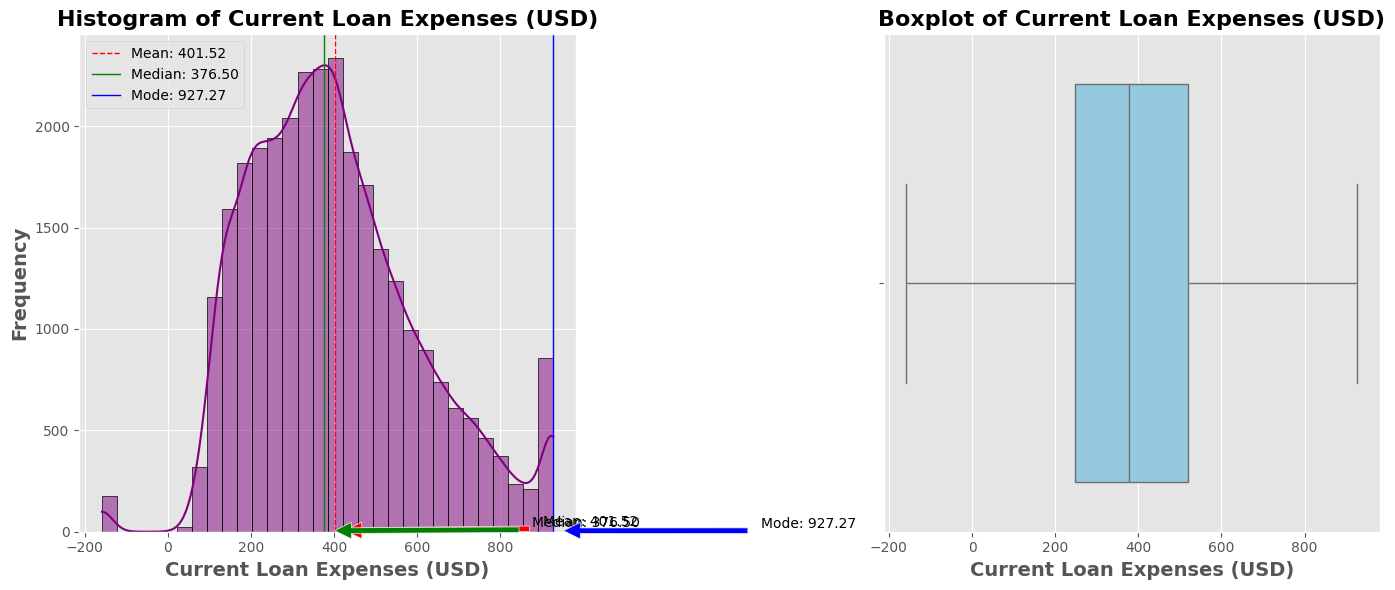

In [53]:
# Assuming 'dfn' is your DataFrame
expenses = dfn['Current Loan Expenses (USD)']

# Calculate statistics
mean_expenses = expenses.mean()
median_expenses = expenses.median()
mode_expenses = expenses.mode()[0]
std_expenses = expenses.std()
var_expenses = expenses.var()
min_expenses = expenses.min()
max_expenses = expenses.max()
quantiles = expenses.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats_expenses = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_expenses, median_expenses, mode_expenses, std_expenses, var_expenses, min_expenses, max_expenses, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats_expenses)

# Visualization
plt.figure(figsize=(14, 6))

# Histogram with vivid colors and KDE
plt.subplot(1, 2, 1)
sns.histplot(expenses, kde=True, color='purple', bins=30, edgecolor='black')
plt.axvline(mean_expenses, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_expenses:.2f}')
plt.axvline(median_expenses, color='green', linestyle='-', linewidth=1, label=f'Median: {median_expenses:.2f}')
plt.axvline(mode_expenses, color='blue', linestyle='-', linewidth=1, label=f'Mode: {mode_expenses:.2f}')
plt.title('Histogram of Current Loan Expenses (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Current Loan Expenses (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_expenses:.2f}', xy=(mean_expenses, 5), xytext=(mean_expenses + 500, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_expenses:.2f}', xy=(median_expenses, 5), xytext=(median_expenses + 500, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_expenses:.2f}', xy=(mode_expenses, 5), xytext=(mode_expenses + 500, 20), arrowprops=dict(facecolor='blue', shrink=0.05))

# Boxplot with expressive colors
plt.subplot(1, 2, 2)
sns.boxplot(x=expenses, color='skyblue')
plt.title('Boxplot of Current Loan Expenses (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Current Loan Expenses (USD)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### **4.1.7.Analysing the Credit Score Column**
The code calculates and prints various statistical measures for the ***'Credit Score'*** column in a DataFrame ***(dfn)***, including ***mean***, ***median***, ***mode***, ***standard deviation***, ***variance***, ***minimum***, ***maximum***, and ***quantiles***. It then visualizes the distribution of the ***'Credit Score'*** using a histogram and a boxplot.

         Statistic        Value
0             Mean   739.885381
1           Median   739.885381
2             Mode   739.885381
3          Std Dev    70.085602
4         Variance  4911.991562
5              Min   580.000000
6              Max   896.260000
7  25th Percentile   685.415000
8  50th Percentile   739.885381
9  75th Percentile   795.140000


C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


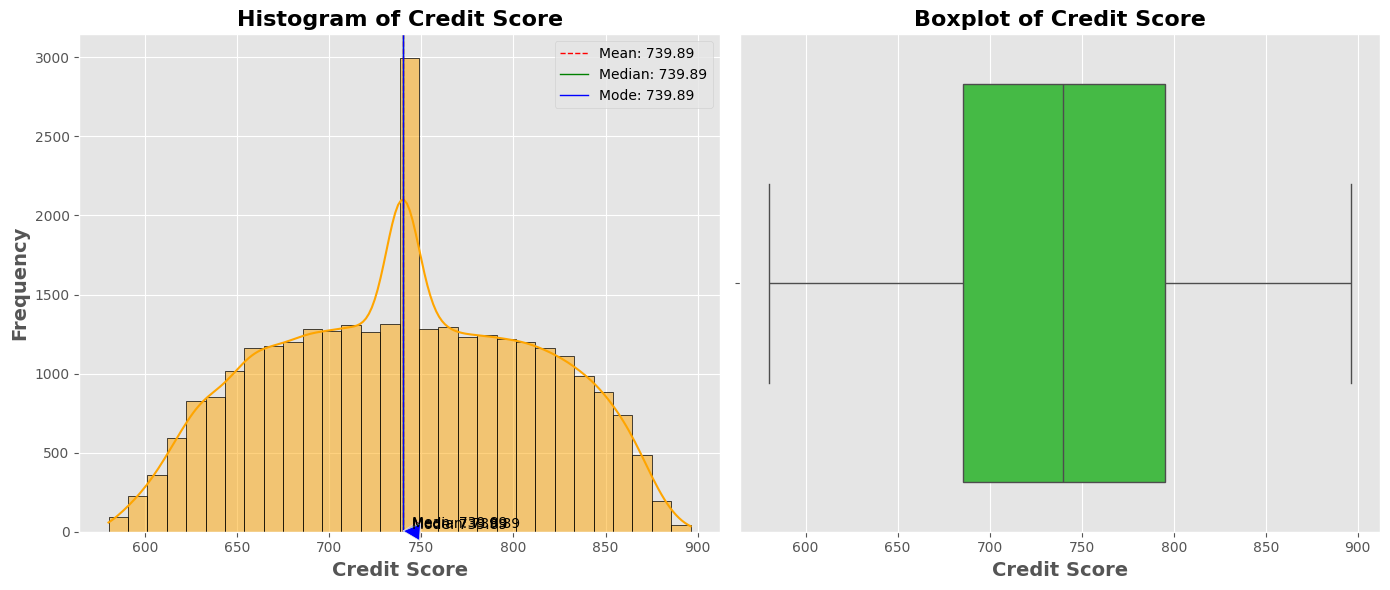

In [54]:

# Assuming 'dfn' is your DataFrame
credit_score = dfn['Credit Score']

# Calculate statistics
mean_credit_score = credit_score.mean()
median_credit_score = credit_score.median()
mode_credit_score = credit_score.mode()[0]
std_credit_score = credit_score.std()
var_credit_score = credit_score.var()
min_credit_score = credit_score.min()
max_credit_score = credit_score.max()
quantiles = credit_score.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats_credit_score = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_credit_score, median_credit_score, mode_credit_score, std_credit_score, var_credit_score, min_credit_score, max_credit_score, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats_credit_score)

# Visualization
plt.figure(figsize=(14, 6))

# Histogram with vivid colors and KDE
plt.subplot(1, 2, 1)
sns.histplot(credit_score, kde=True, color='orange', bins=30, edgecolor='black')
plt.axvline(mean_credit_score, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_credit_score:.2f}')
plt.axvline(median_credit_score, color='green', linestyle='-', linewidth=1, label=f'Median: {median_credit_score:.2f}')
plt.axvline(mode_credit_score, color='blue', linestyle='-', linewidth=1, label=f'Mode: {mode_credit_score:.2f}')
plt.title('Histogram of Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_credit_score:.2f}', xy=(mean_credit_score, 5), xytext=(mean_credit_score + 5, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_credit_score:.2f}', xy=(median_credit_score, 5), xytext=(median_credit_score + 5, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_credit_score:.2f}', xy=(mode_credit_score, 5), xytext=(mode_credit_score + 5, 20), arrowprops=dict(facecolor='blue', shrink=0.05))

# Boxplot with expressive colors
plt.subplot(1, 2, 2)
sns.boxplot(x=credit_score, color='limegreen')
plt.title('Boxplot of Credit Score', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### **4.1.8.Analysing the Property Price Column**
The code calculates and prints various statistical measures for the ***'Property Price'*** column in a DataFrame ***(dfn)***, including ***mean***, ***median***, ***mode***, ***standard deviation***, ***variance***, ***minimum***, ***maximum***, and ***quantiles***. It then visualizes the distribution of the ***'Property Price'*** using a histogram and a boxplot.

         Statistic         Value
0             Mean  1.296614e+05
1           Median  1.099936e+05
2             Mode  3.563436e+05
3          Std Dev  8.650662e+04
4         Variance  7.483395e+09
5              Min -9.990000e+02
6              Max  3.563436e+05
7  25th Percentile  6.057216e+04
8  50th Percentile  1.099936e+05
9  75th Percentile  1.788807e+05


C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


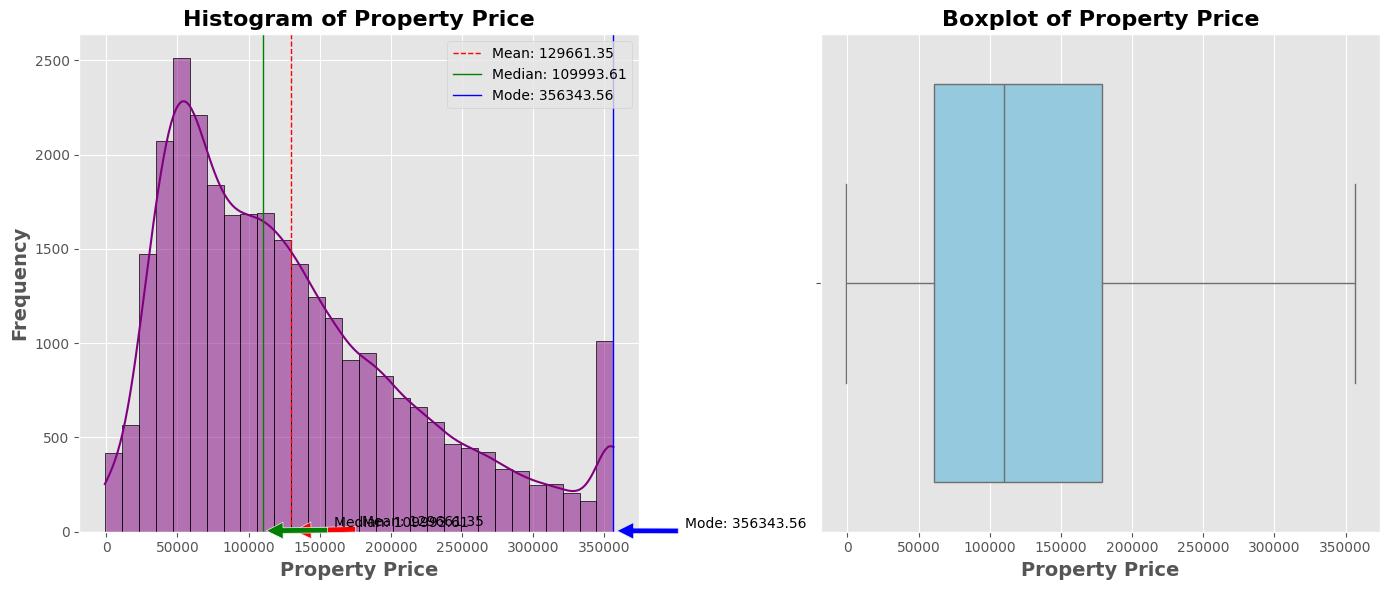

In [55]:


# Assuming 'dfn' is your DataFrame
property_price = dfn['Property Price']

# Calculate statistics
mean_property_price = property_price.mean()
median_property_price = property_price.median()
mode_property_price = property_price.mode()[0]
std_property_price = property_price.std()
var_property_price = property_price.var()
min_property_price = property_price.min()
max_property_price = property_price.max()
quantiles = property_price.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats_property_price = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_property_price, median_property_price, mode_property_price, std_property_price, var_property_price, min_property_price, max_property_price, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats_property_price)

# Visualization
plt.figure(figsize=(14, 6))

# Histogram with vivid colors and KDE
plt.subplot(1, 2, 1)
sns.histplot(property_price, kde=True, color='purple', bins=30, edgecolor='black')
plt.axvline(mean_property_price, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_property_price:.2f}')
plt.axvline(median_property_price, color='green', linestyle='-', linewidth=1, label=f'Median: {median_property_price:.2f}')
plt.axvline(mode_property_price, color='blue', linestyle='-', linewidth=1, label=f'Mode: {mode_property_price:.2f}')
plt.title('Histogram of Property Price', fontsize=16, fontweight='bold')
plt.xlabel('Property Price', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_property_price:.2f}', xy=(mean_property_price, 5), xytext=(mean_property_price + 50000, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_property_price:.2f}', xy=(median_property_price, 5), xytext=(median_property_price + 50000, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_property_price:.2f}', xy=(mode_property_price, 5), xytext=(mode_property_price + 50000, 20), arrowprops=dict(facecolor='blue', shrink=0.05))

# Boxplot with expressive colors
plt.subplot(1, 2, 2)
sns.boxplot(x=property_price, color='skyblue')
plt.title('Boxplot of Property Price', fontsize=16, fontweight='bold')
plt.xlabel('Property Price', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### **4.1.9.Analysing the Loan Sanction Amount (USD) Column**
The code analyzes the ***'Loan Sanction Amount (USD)'*** data from a DataFrame ***(dfn)***. It computes statistical measures such as ***mean***, ***median***, ***mode***, ***standard deviation***, ***variance***, ***minimum***, ***maximum***, and ***quartiles***. These statistics are then displayed in a summary DataFrame and visualized using ***Matplotlib*** and ***Seaborn libraries***. The visualization includes a histogram with ***KDE (Kernel Density Estimate)*** to show the distribution of ***Loan Sanction Amounts***, annotated with ***mean***, ***median***, and ***mode***.

         Statistic         Value
0             Mean  4.718088e+04
1           Median  3.606924e+04
2             Mode  0.000000e+00
3          Std Dev  4.628341e+04
4         Variance  2.142154e+09
5              Min -9.990000e+02
6              Max  1.844088e+05
7  25th Percentile  0.000000e+00
8  50th Percentile  3.606924e+04
9  75th Percentile  7.376353e+04


C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


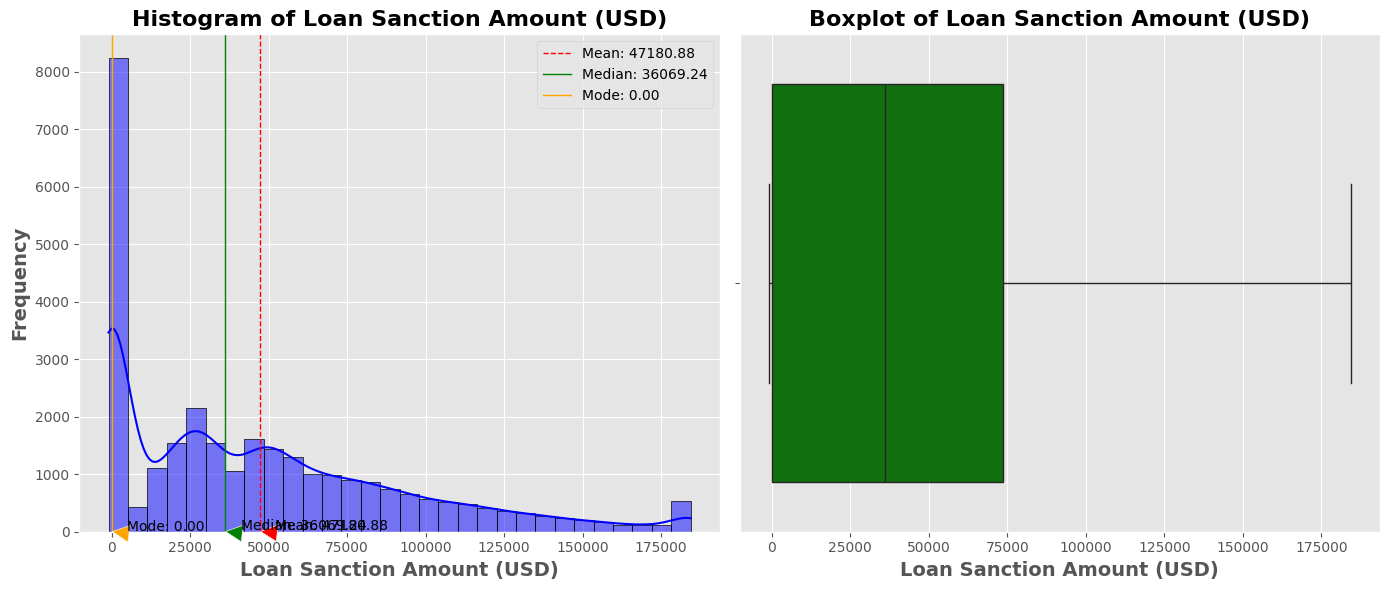

In [56]:


# Assuming 'dfn' is your DataFrame
loan_sanction_amount = dfn['Loan Sanction Amount (USD)']

# Calculate statistics
mean_loan_sanction_amount = loan_sanction_amount.mean()
median_loan_sanction_amount = loan_sanction_amount.median()
mode_loan_sanction_amount = loan_sanction_amount.mode()[0]
std_loan_sanction_amount = loan_sanction_amount.std()
var_loan_sanction_amount = loan_sanction_amount.var()
min_loan_sanction_amount = loan_sanction_amount.min()
max_loan_sanction_amount = loan_sanction_amount.max()
quantiles = loan_sanction_amount.quantile([0.25, 0.5, 0.75])

# Print summary statistics
summary_stats_loan_sanction_amount = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Min', 'Max', '25th Percentile', '50th Percentile', '75th Percentile'],
    'Value': [mean_loan_sanction_amount, median_loan_sanction_amount, mode_loan_sanction_amount, std_loan_sanction_amount, var_loan_sanction_amount, min_loan_sanction_amount, max_loan_sanction_amount, quantiles[0.25], quantiles[0.5], quantiles[0.75]]
})
print(summary_stats_loan_sanction_amount)

# Visualization
plt.figure(figsize=(14, 6))

# Histogram with vivid colors and KDE
plt.subplot(1, 2, 1)
sns.histplot(loan_sanction_amount, kde=True, color='blue', bins=30, edgecolor='black')
plt.axvline(mean_loan_sanction_amount, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_loan_sanction_amount:.2f}')
plt.axvline(median_loan_sanction_amount, color='green', linestyle='-', linewidth=1, label=f'Median: {median_loan_sanction_amount:.2f}')
plt.axvline(mode_loan_sanction_amount, color='orange', linestyle='-', linewidth=1, label=f'Mode: {mode_loan_sanction_amount:.2f}')
plt.title('Histogram of Loan Sanction Amount (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Loan Sanction Amount (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.legend()

# Annotate mean, median, mode
plt.annotate(f'Mean: {mean_loan_sanction_amount:.2f}', xy=(mean_loan_sanction_amount, 5), xytext=(mean_loan_sanction_amount + 5000, 30), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'Median: {median_loan_sanction_amount:.2f}', xy=(median_loan_sanction_amount, 5), xytext=(median_loan_sanction_amount + 5000, 25), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Mode: {mode_loan_sanction_amount:.2f}', xy=(mode_loan_sanction_amount, 5), xytext=(mode_loan_sanction_amount + 5000, 20), arrowprops=dict(facecolor='orange', shrink=0.05))

# Boxplot with expressive colors
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_sanction_amount, color='green')
plt.title('Boxplot of Loan Sanction Amount (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Loan Sanction Amount (USD)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### **4.2.Bivar Analysis**

#### **4.2.1.Importing Libraries and Loading Data**
This section imports the necessary libraries (***pandas***, ***seaborn***, and ***matplotlib***) and loads the dataset from a ***CSV file***. It also sets the ***seaborn style*** for the plots and defines a light green color palette for consistency in visualizations.


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original CSV file
df = pd.read_csv('Loan DataSet NullRemoved.csv')

# Set the style of seaborn
sns.set(style='whitegrid')

# Define a light green color palette
palette = sns.light_palette("green", reverse=False, n_colors=10)


#### **4.2.2.Function to Create Scatter Plots**
This section defines a reusable function ***'create_scatter_plot'*** that generates scatter plots. The function takes in parameters for the ***x*** and ***y*** variables, title, x-axis label, and y-axis label, and uses seaborn to create the plot.


In [58]:
def create_scatter_plot(x, y, title, xlabel, ylabel):
    sns.scatterplot(data=df, x=x, y=y, palette=palette)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


#### **4.2.3.Generating Scatter Plots**
This section uses the ***create_scatter_plot*** function to generate multiple scatter plots for different variable pairs from the dataset. It includes plots for ***Income*** vs ***Loan Amount Request***, ***Income*** vs ***Loan Sanction Amount***, ***Credit Score*** vs ***Loan Amount Request***, ***Credit Score*** vs ***Loan Sanction Amount***, and ***Income*** vs ***Credit Score***.


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3267122176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3267122176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3267122176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3267122176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3267122176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, palette=palette)


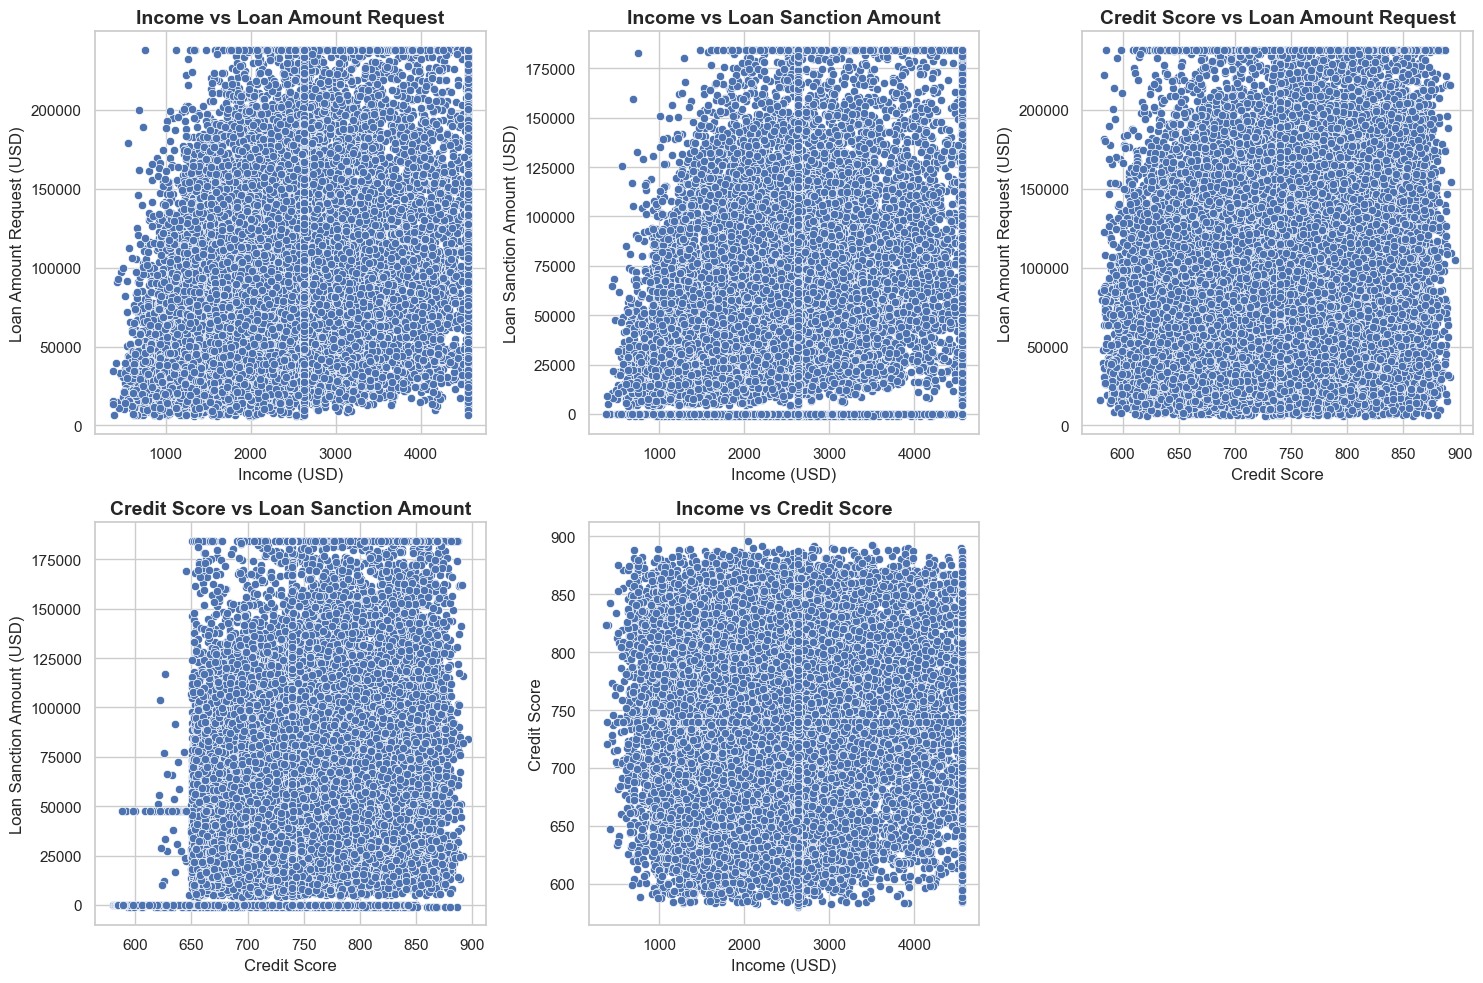

In [59]:
# Cell 3: Scatter Plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
create_scatter_plot('Income (USD)', 'Loan Amount Request (USD)', 'Income vs Loan Amount Request', 'Income (USD)', 'Loan Amount Request (USD)')

plt.subplot(2, 3, 2)
create_scatter_plot('Income (USD)', 'Loan Sanction Amount (USD)', 'Income vs Loan Sanction Amount', 'Income (USD)', 'Loan Sanction Amount (USD)')

plt.subplot(2, 3, 3)
create_scatter_plot('Credit Score', 'Loan Amount Request (USD)', 'Credit Score vs Loan Amount Request', 'Credit Score', 'Loan Amount Request (USD)')

plt.subplot(2, 3, 4)
create_scatter_plot('Credit Score', 'Loan Sanction Amount (USD)', 'Credit Score vs Loan Sanction Amount', 'Credit Score', 'Loan Sanction Amount (USD)')

plt.subplot(2, 3, 5)
create_scatter_plot('Income (USD)', 'Credit Score', 'Income vs Credit Score', 'Income (USD)', 'Credit Score')

plt.tight_layout()
plt.show()


#### **4.2.4.Function to Create Bar Plots**
This section defines a reusable function ***create_bar_plot*** that generates bar plots. The function takes in parameters for the ***x*** and ***y*** variables, title, x-axis label, y-axis label, and the rotation angle for x-axis labels. It uses seaborn to create the plot with the defined color palette.


In [60]:
# Cell 4: Function to create bar plots
def create_bar_plot(x, y, title, xlabel, ylabel, rotation=45):
    sns.barplot(x=x, y=y, data=df, ci=None, palette=palette)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)


#### **4.2.5.Generating Bar Plots**
This section uses the ***create_bar_plot*** function to generate multiple bar plots for different variable pairs from the dataset. It includes plots for ***Loan Sanction Amount*** by ***Property Location***, ***Income*** by ***Type of Employment***, and ***Loan Amount Request*** by ***Profession***.


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3605955968.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=y, data=df, ci=None, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3605955968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, ci=None, palette=palette)
C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\3605955968.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=x, y=y, data=df, ci=None, palette=palette)
C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

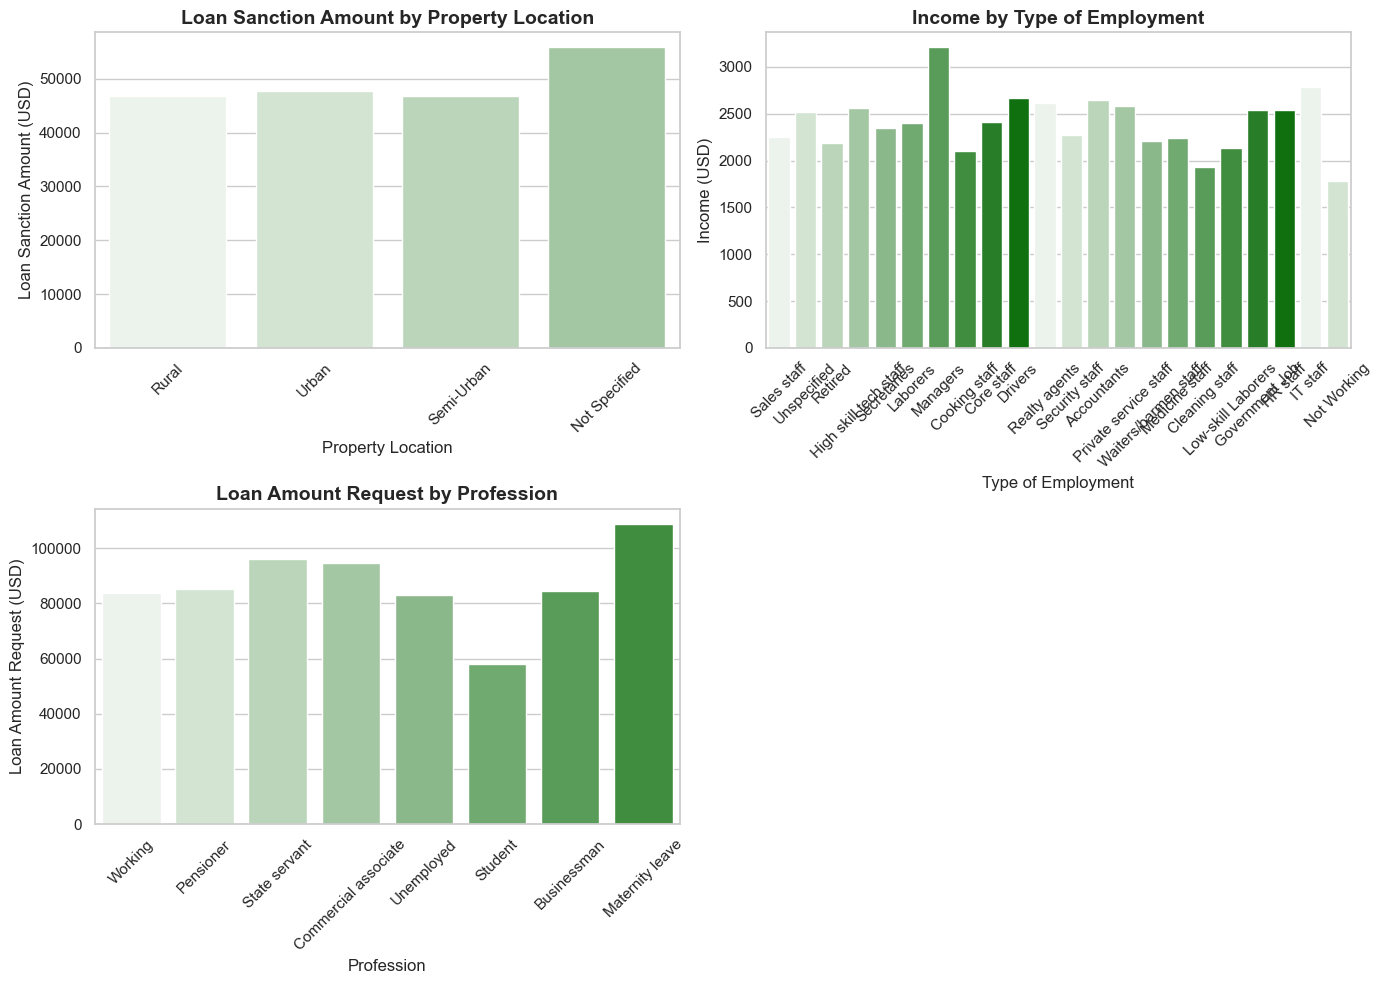

In [61]:
# Cell 5: Bar Plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
create_bar_plot('Property Location', 'Loan Sanction Amount (USD)', 'Loan Sanction Amount by Property Location', 'Property Location', 'Loan Sanction Amount (USD)')

plt.subplot(2, 2, 2)
create_bar_plot('Type of Employment', 'Income (USD)', 'Income by Type of Employment', 'Type of Employment', 'Income (USD)')

plt.subplot(2, 2, 3)
create_bar_plot('Profession', 'Loan Amount Request (USD)', 'Loan Amount Request by Profession', 'Profession', 'Loan Amount Request (USD)')

plt.tight_layout()
plt.show()


### **4.3.Multivar Analysis**

#### **4.3.1.Average Loan Sanction Amount by Gender and Profession**
 This code loads a CSV file containing loan data, groups the data by ***gender*** and ***profession***, calculates the ***average loan sanction*** amount for each group, and pivots the table for easier plotting. 
 Finally, it plots a ***bar chart*** showing the ***average loan sanction amount*** by ***gender*** and ***profession***.


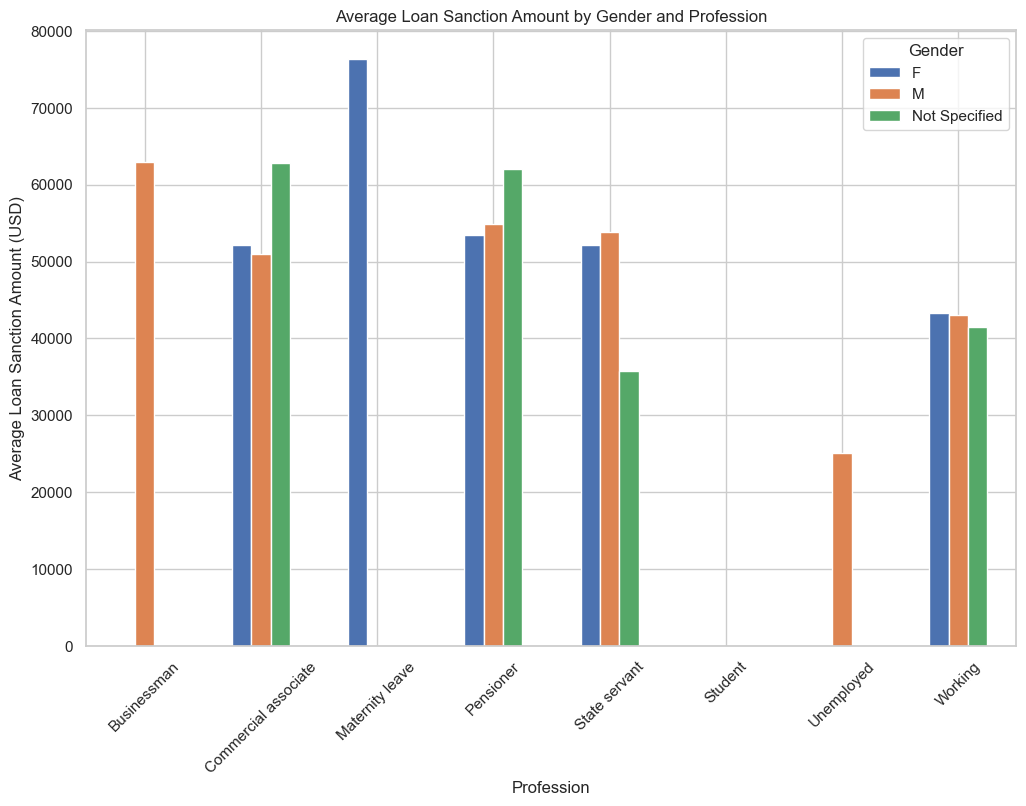

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Loan DataSet NullRemoved.csv'
loan_data = pd.read_csv(file_path)

# Group by Gender and Profession and calculate the average Loan Sanction Amount
grouped_data = loan_data.groupby(['Gender', 'Profession'])['Loan Sanction Amount (USD)'].mean().reset_index()

# Pivot the table to make plotting easier
pivot_table = grouped_data.pivot(index='Profession', columns='Gender', values='Loan Sanction Amount (USD)')

# Plot the data
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Average Loan Sanction Amount by Gender and Profession')
plt.xlabel('Profession')
plt.ylabel('Average Loan Sanction Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


#### **4.3.2.Total Loan Sanction Amount by Age Group and Income Stability**
This code reads a CSV file of loan data, ***categorizes ages*** into ***groups***, and ***calculates*** the ***total loan sanction amount*** per ***age group*** and ***income stability***. 
It uses a ***pivot table*** for easier plotting and generates a ***bar plot** to visualize the ***total loan sanction amount*** across ***different age groups*** and ***income stability levels***.

C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\2275757126.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = loan_data.groupby(['Age Group', 'Income Stability'])['Loan Sanction Amount (USD)'].sum().reset_index()


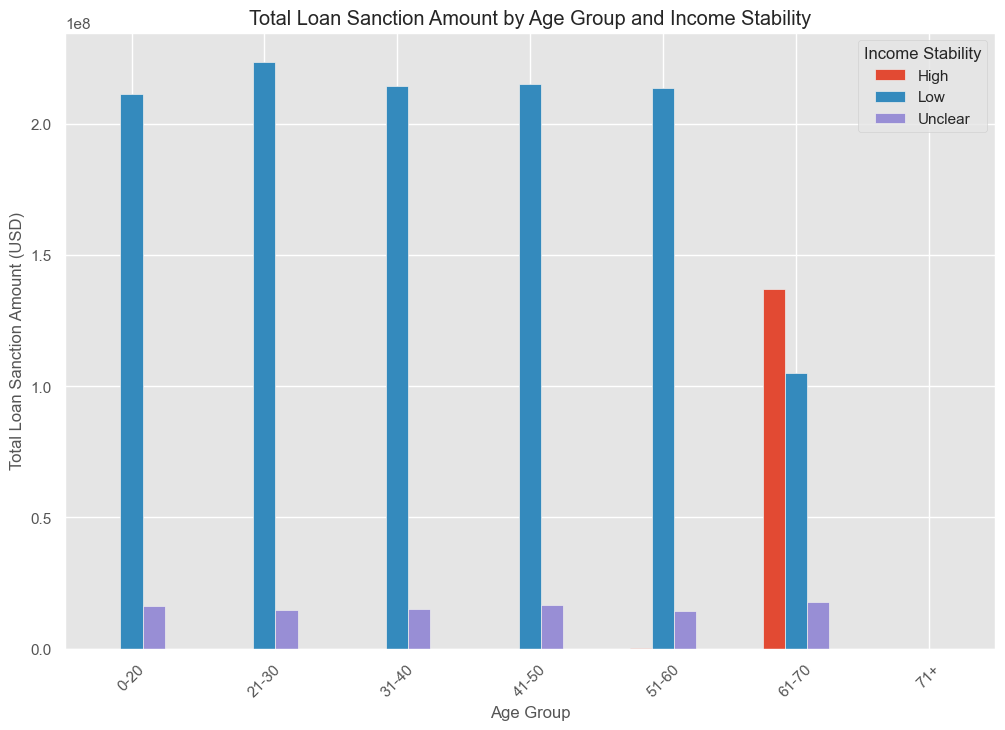

In [63]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
loan_data['Age Group'] = pd.cut(loan_data['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and Income Stability and sum the Loan Sanction Amount
grouped_data = loan_data.groupby(['Age Group', 'Income Stability'])['Loan Sanction Amount (USD)'].sum().reset_index()

# Pivot the table to make plotting easier
pivot_table = grouped_data.pivot(index='Age Group', columns='Income Stability', values='Loan Sanction Amount (USD)')

# Plot the data with a different style
plt.style.use('ggplot')
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Total Loan Sanction Amount by Age Group and Income Stability')
plt.xlabel('Age Group')
plt.ylabel('Total Loan Sanction Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Income Stability')
plt.show()


#### **4.3.3.Average Loan Sanction Amount by Location and Type of Employment**
This code loads a CSV file of ***loan data***, ***groups it by*** ***location*** and ***employment type***, and ***calculates*** the ***average loan sanction amount*** for each group. 
It then sorts the data and creates a ***line plot*** to visualize the ***average loan sanction amount*** by ***location*** and ***type of employment***.

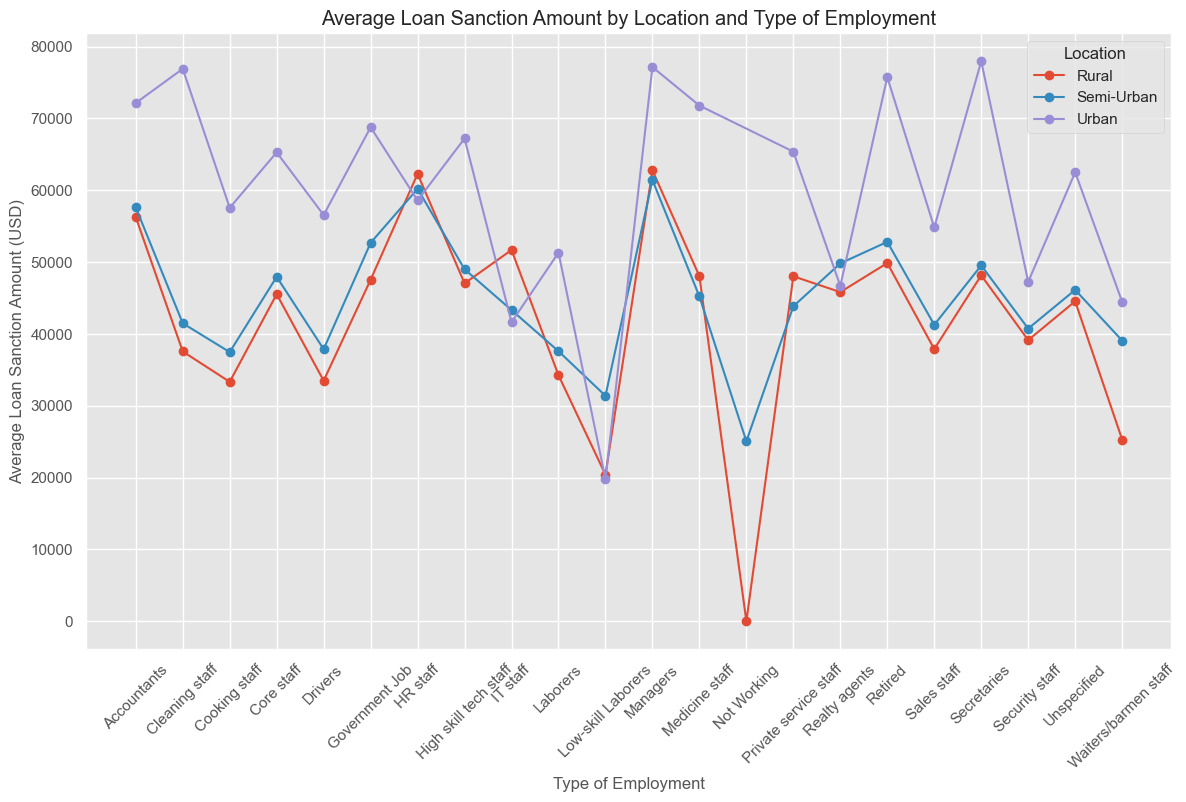

In [64]:
# Group by Location and Type of Employment and calculate the average Loan Sanction Amount
grouped_data = loan_data.groupby(['Location', 'Type of Employment'])['Loan Sanction Amount (USD)'].mean().reset_index()

# Sort the data for better visualization in the line plot
grouped_data = grouped_data.sort_values(by=['Location', 'Type of Employment'])

# Plot the data as a line plot
plt.figure(figsize=(14, 8))
for location in grouped_data['Location'].unique():
    subset = grouped_data[grouped_data['Location'] == location]
    plt.plot(subset['Type of Employment'], subset['Loan Sanction Amount (USD)'], marker='o', label=location)

plt.title('Average Loan Sanction Amount by Location and Type of Employment')
plt.xlabel('Type of Employment')
plt.ylabel('Average Loan Sanction Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.grid(True)
plt.show()


#### **4.3.4.Impact of Credit Score and Income on Loan Sanction Amount**
This code loads a CSV file containing loan data and bins the ***Income (USD)*** and ***Credit Score*** columns into ***10 intervals each***. It then creates ***two box plots***: one showing the ***impact 
of income*** on the ***loan sanction amount*** and the other showing the ***impact of credit score*** on the ***loan sanction amount***.


C:\Users\bhati\AppData\Local\Temp\ipykernel_2312\4190053340.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=flo

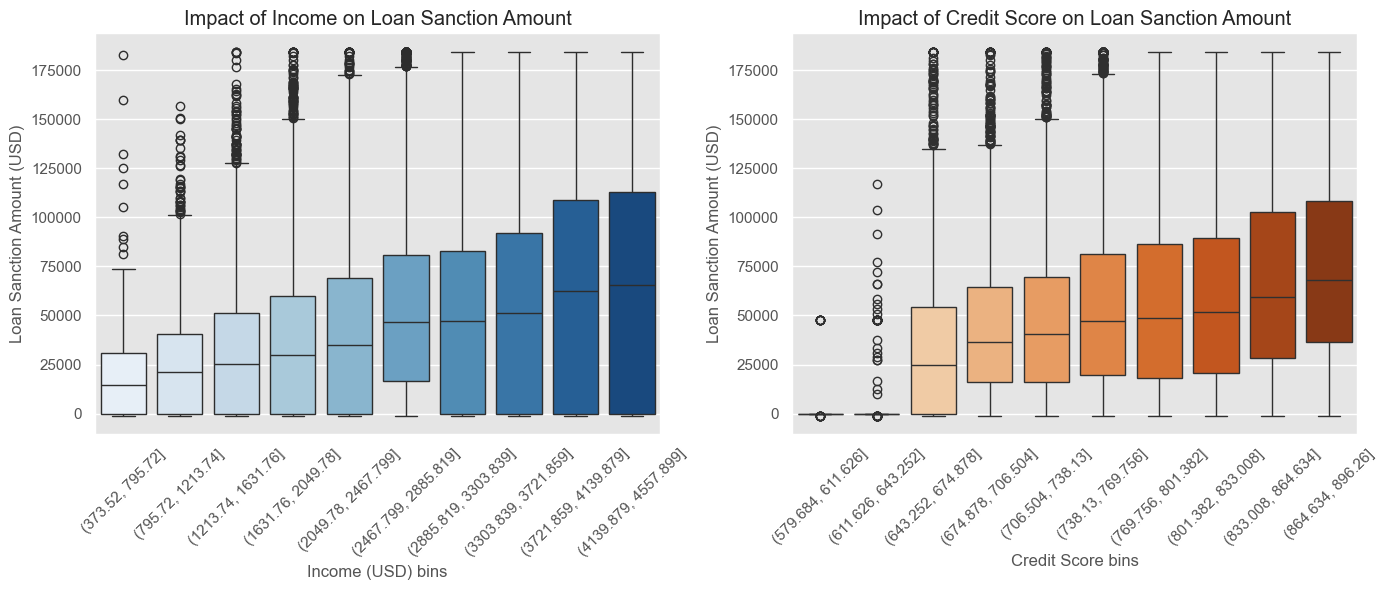

In [65]:
import seaborn as sns
# Bin the Income and Credit Score
loan_data['Income Bins'] = pd.cut(loan_data['Income (USD)'], bins=10)
loan_data['Credit Score Bins'] = pd.cut(loan_data['Credit Score'], bins=10)

# Plot the data
plt.figure(figsize=(14, 6))

# Box plot for Income vs. Loan Sanction Amount
plt.subplot(1, 2, 1)
sns.boxplot(
    x='Income Bins',
    y='Loan Sanction Amount (USD)',
    data=loan_data,
    palette="Blues"
)
plt.title('Impact of Income on Loan Sanction Amount')
plt.xlabel('Income (USD) bins')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xticks(rotation=45)

# Box plot for Credit Score vs. Loan Sanction Amount
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Credit Score Bins',
    y='Loan Sanction Amount (USD)',
    data=loan_data,
    palette="Oranges"
)
plt.title('Impact of Credit Score on Loan Sanction Amount')
plt.xlabel('Credit Score bins')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### **4.3.5.Loan Sanction Amount Analysis by Age Group, Profession and Location**
This Python code snippet analyzes and visualizes ***loan sanction amounts*** across different ***age groups***, ***professions***, and ***locations*** using ***pandas*** for ***data handling***, ***seaborn*** for ***plotting***, and ***matplotlib*** for customization and display. It ***categorizes ages*** into ***groups***, creates a ***violin plot*** to show the ***distribution*** of ***loan amounts***, and adds titles, labels, and legends for clarity and interpretation.

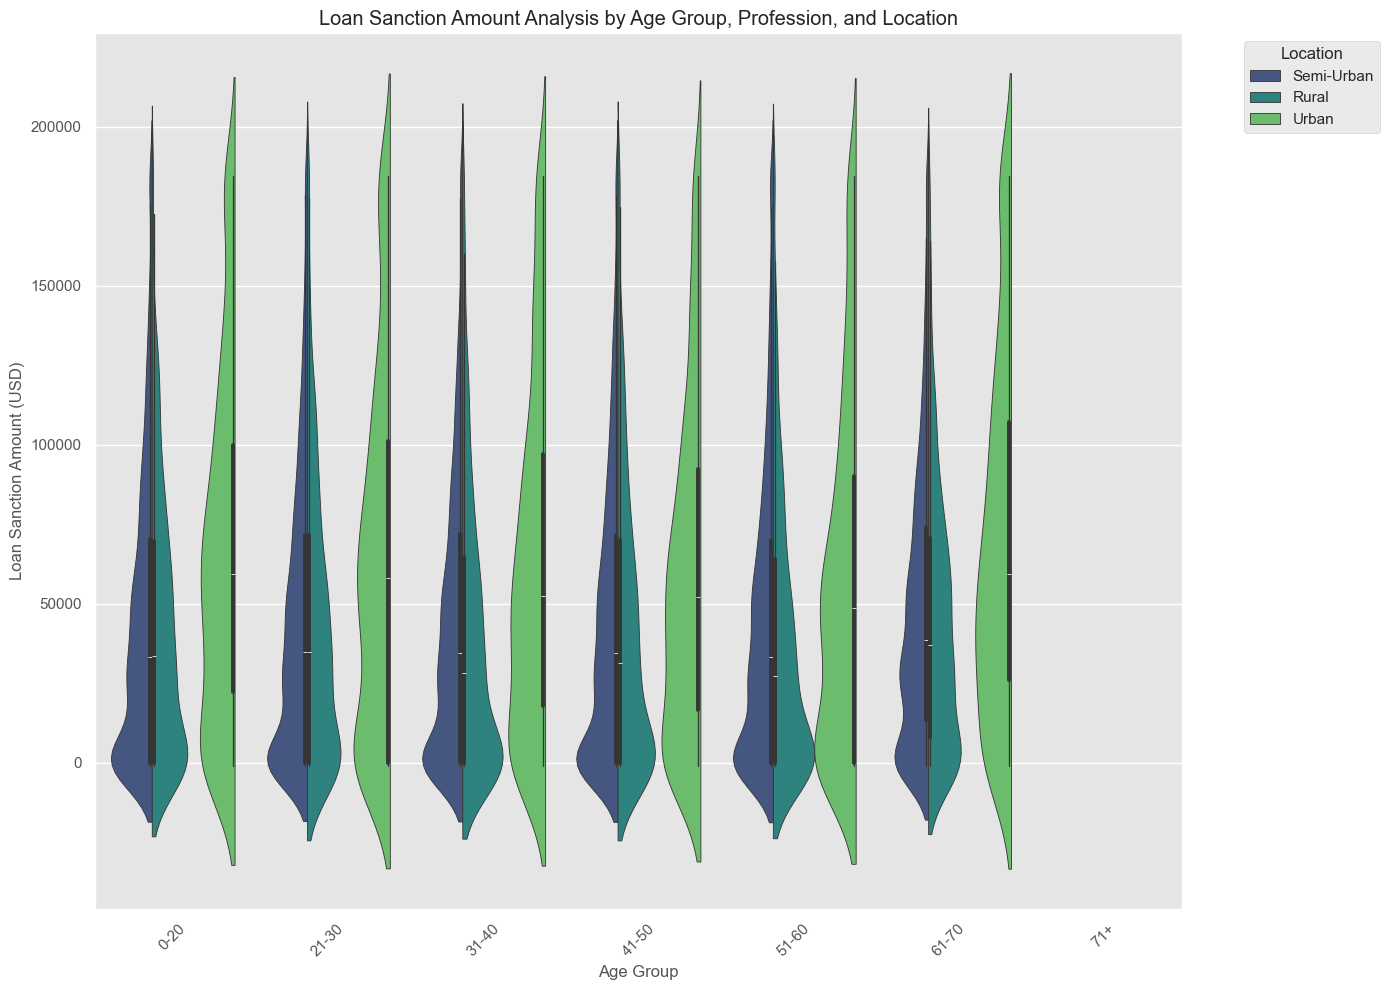

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
loan_data['Age Group'] = pd.cut(loan_data['Age'], bins=bins, labels=labels, right=False)

# Create a violin plot
plt.figure(figsize=(14, 10))

# Use Seaborn's violinplot to create the plot
sns.violinplot(
    x='Age Group',
    y='Loan Sanction Amount (USD)',
    hue='Location',
    data=loan_data,
    split=True,
    palette='viridis'
)

# Add titles and labels
plt.title('Loan Sanction Amount Analysis by Age Group, Profession, and Location')
plt.xlabel('Age Group')
plt.ylabel('Loan Sanction Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### **4.3.6.KDE Plot of Loan Sanction Amounts by Co-Applicant Status**
This code loads a loan dataset from a CSV file and creates a ***Kernel Density Estimate (KDE)*** plot using ***Seaborn***. The plot visualizes the distribution of ***loan sanction amounts***, differentiating between
 loans with and ***without co-applicants***, with areas filled and stacked for clarity. The plot is displayed using ***Matplotlib***.

C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bhati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


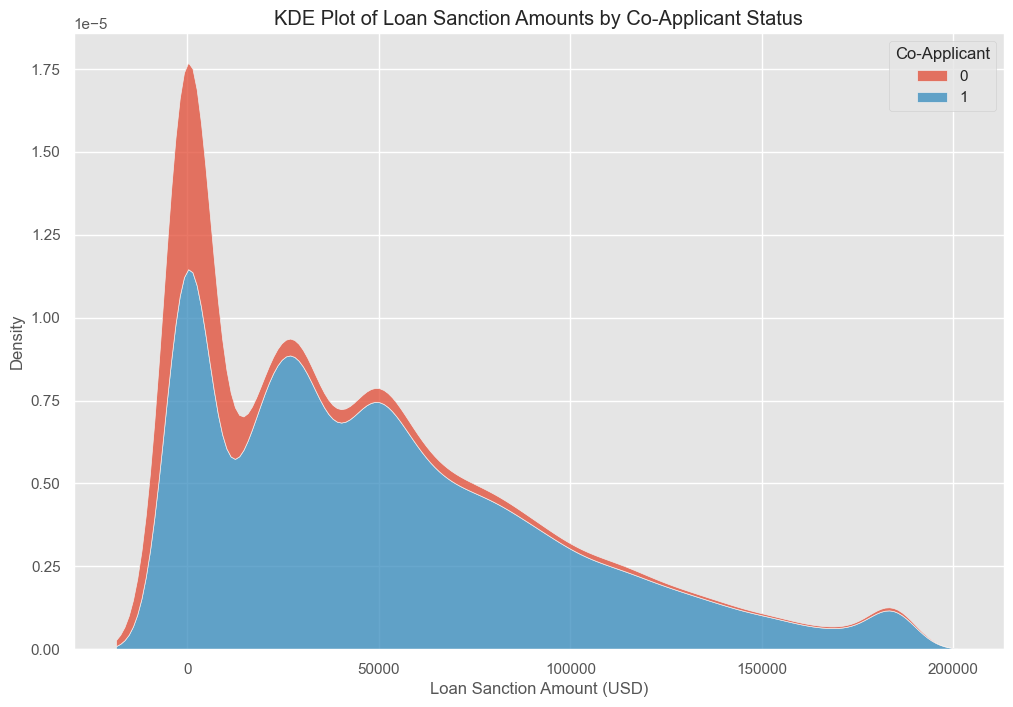

In [67]:
df = loan_data

# Create a KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Loan Sanction Amount (USD)', hue='Co-Applicant', fill=True, multiple='stack')
plt.title('KDE Plot of Loan Sanction Amounts by Co-Applicant Status')
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Density')


# Show the plot (optional)
plt.show()


#### **4.3.7.Relationship between Loan Amount, Current Loan Expenses, Credit Score and Loan Sanction Amount**
This Python code loads a CSV file containing loan data. It selects ***four relevant columnn*** and uses ***Seaborn's pairplot*** to create scatter plots, visualizing relationships between ***Loan Amount 
Request***, ***Current Loan Expenses***, ***Credit Score***, and ***Loan Sanction Amount***. Finally, it displays the plot.

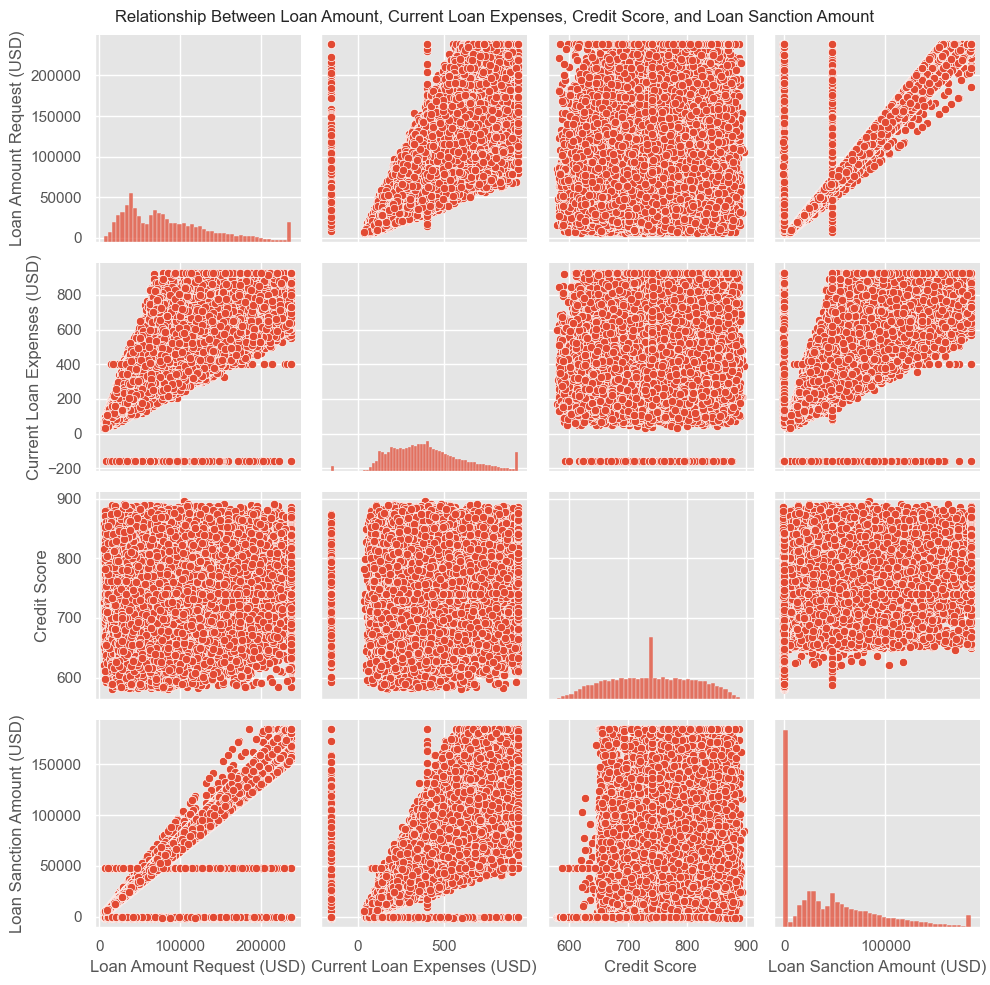

In [68]:
df = dfn

# Select relevant columns
cols = ['Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Credit Score', 'Loan Sanction Amount (USD)']
df_selected = df[cols]

# Create pairplot with scatter plots
sns.pairplot(df_selected, kind='scatter')
plt.suptitle('Relationship Between Loan Amount, Current Loan Expenses, Credit Score, and Loan Sanction Amount')
plt.tight_layout()

# Show the plot
plt.show()
